In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATASET_PATH = '/content/HR Employee Attrition.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [ ]:
target = df['Attrition']

df = df.drop(columns='Attrition')
df = pd.concat([df,target], axis=1)

In [ ]:
df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df_base = df.select_dtypes('int')
df_base.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_base, target, test_size=0.2, random_state=42, stratify=target)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
g_model = GradientBoostingClassifier()
tree_model = DecisionTreeClassifier()

In [ ]:
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
g_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_test_lr = lr_model.predict(X_test)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_test_g = g_model.predict(X_test)
y_pred_test_tree = tree_model.predict(X_test)

In [ ]:
rf_model.score(X_test, y_test)

0.8197278911564626

In [ ]:
pred_list = [y_pred_test_lr, y_pred_test_rf, y_pred_test_g, y_pred_test_tree]
title_list = ['LogisticRegression', 'RandomForestClassifier', 'GradientBoosting', 'DecisionTreeClassifier']
model_list = [lr_model, rf_model, g_model, tree_model]

----------------------------------------------------------------------------------------------------


LogisticRegression


              precision    recall  f1-score   support

          No       0.87      0.98      0.92       247
         Yes       0.65      0.23      0.34        47

    accuracy                           0.86       294
   macro avg       0.76      0.60      0.63       294
weighted avg       0.83      0.86      0.83       294



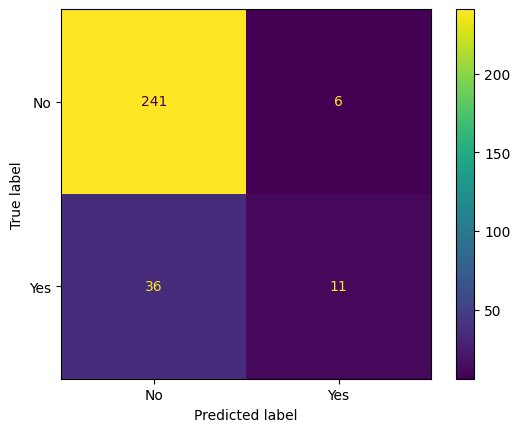

----------------------------------------------------------------------------------------------------


RandomForestClassifier


              precision    recall  f1-score   support

          No       0.85      0.96      0.90       247
         Yes       0.31      0.11      0.16        47

    accuracy                           0.82       294
   macro avg       0.58      0.53      0.53       294
weighted avg       0.76      0.82      0.78       294



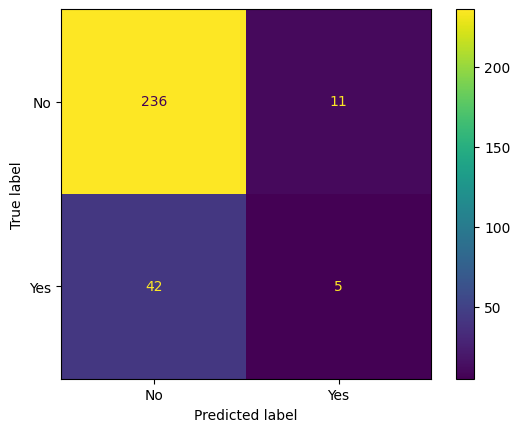

----------------------------------------------------------------------------------------------------


GradientBoosting


              precision    recall  f1-score   support

          No       0.86      0.94      0.90       247
         Yes       0.35      0.17      0.23        47

    accuracy                           0.82       294
   macro avg       0.60      0.55      0.56       294
weighted avg       0.77      0.82      0.79       294



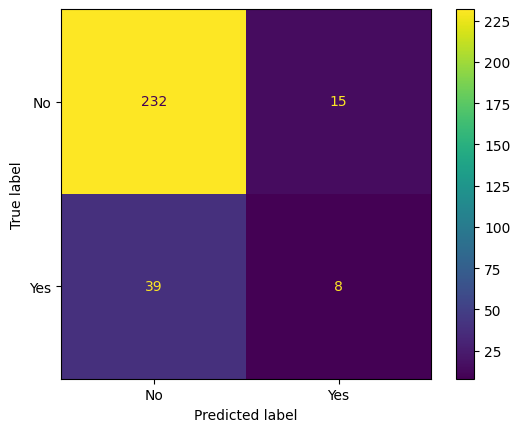

----------------------------------------------------------------------------------------------------


DecisionTreeClassifier


              precision    recall  f1-score   support

          No       0.85      0.83      0.84       247
         Yes       0.23      0.26      0.24        47

    accuracy                           0.74       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.75      0.74      0.75       294



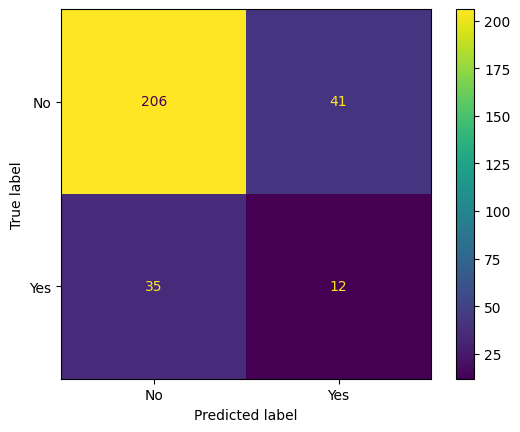

In [ ]:
for enum, pred in enumerate(pred_list):
  print('-' * 100)
  print(f'\n\n{title_list[enum]}\n\n')
  print(classification_report(y_test, pred))
  cm = confusion_matrix(y_test, pred, labels=model_list[enum].classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_list[enum].classes_)
  disp.plot()
  plt.show()

In [ ]:
df.describe().style.background_gradient(cmap='rainbow')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.000000,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.000000,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.000000,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.000000,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

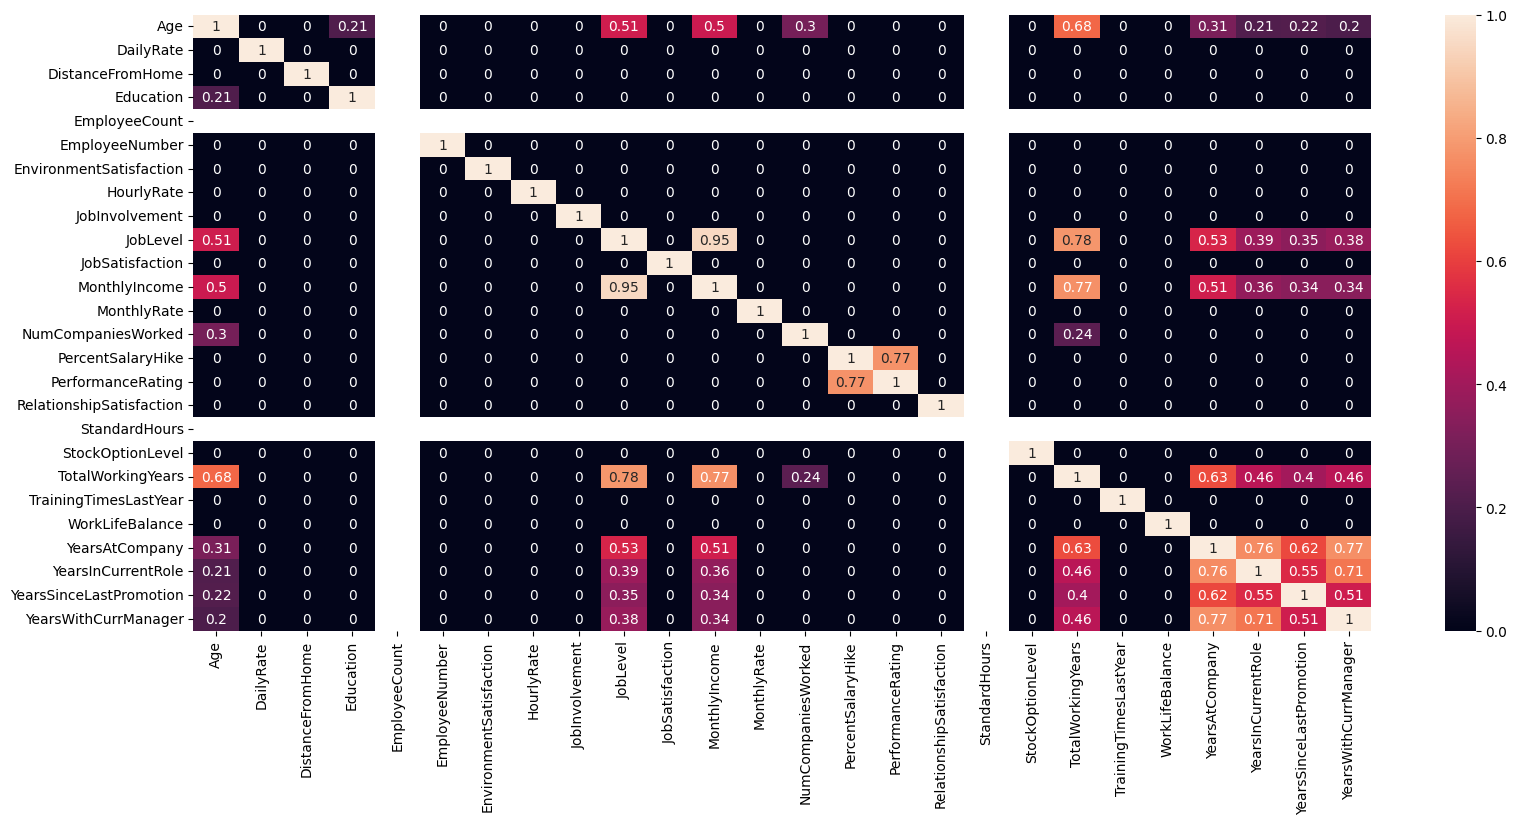

In [ ]:
plt.figure(figsize=(19, 8))

corr = df.corr()

corr[abs(corr < 0.2)] = 0

sns.heatmap(corr, color='blue', annot=True)
plt.show()

In [ ]:
#YearsWithCurrManager, PercentSalaryHike, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, TotalWorkingYears, YearsAtCompany

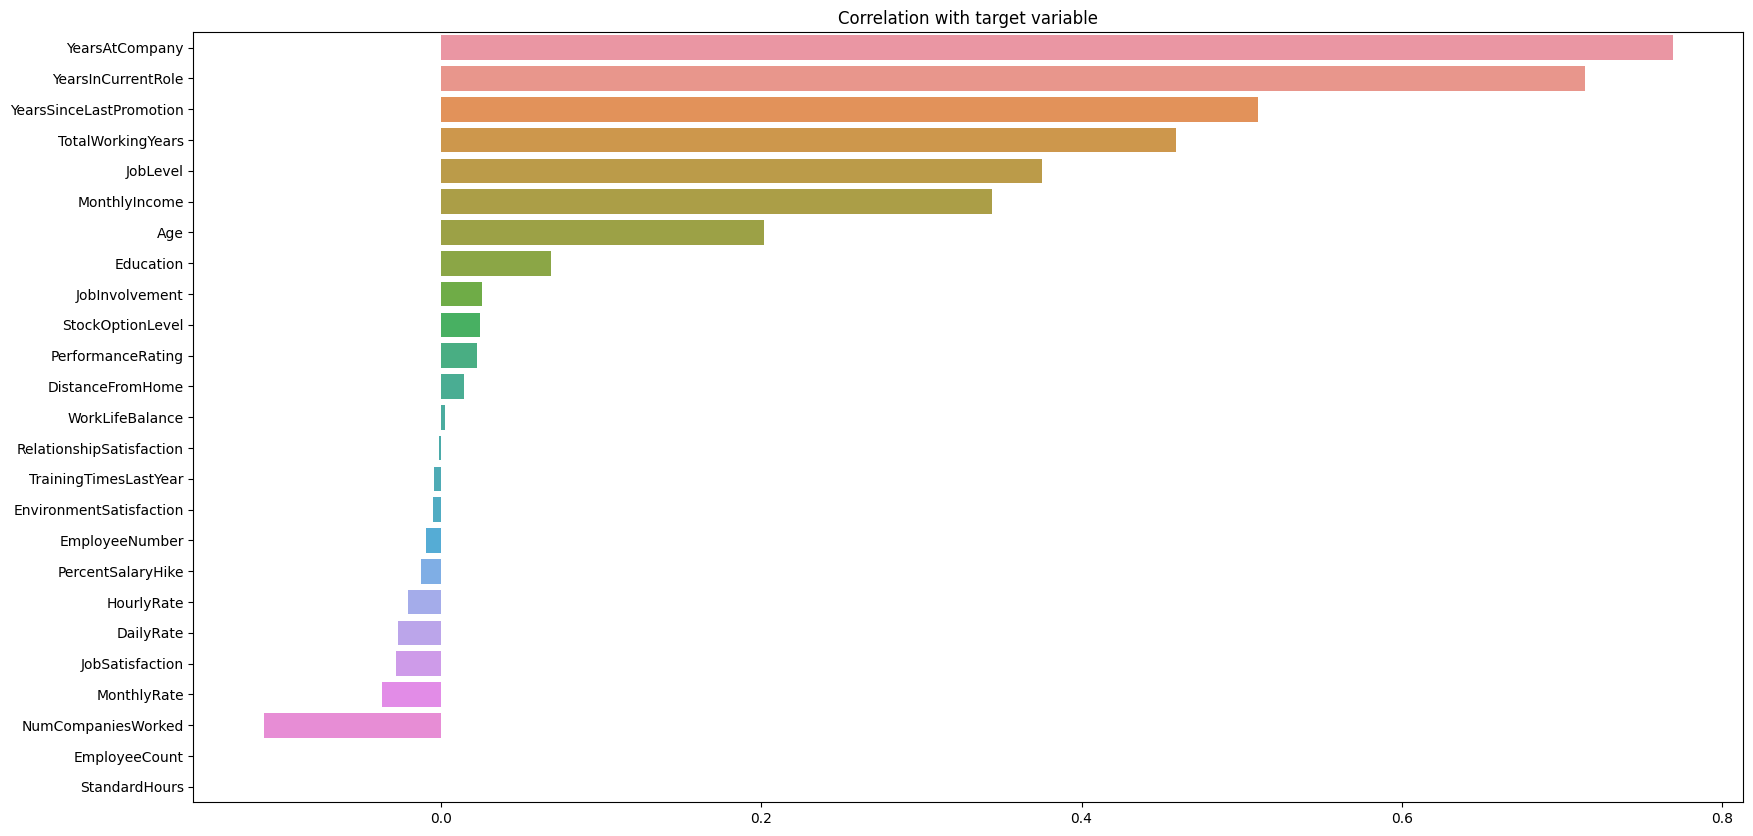

In [ ]:
corr_with_target = df[df.columns].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(20, 10))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()


На гистограммах визуально не наблюдается выбросных аномалий, однако есть бесполезные признаки

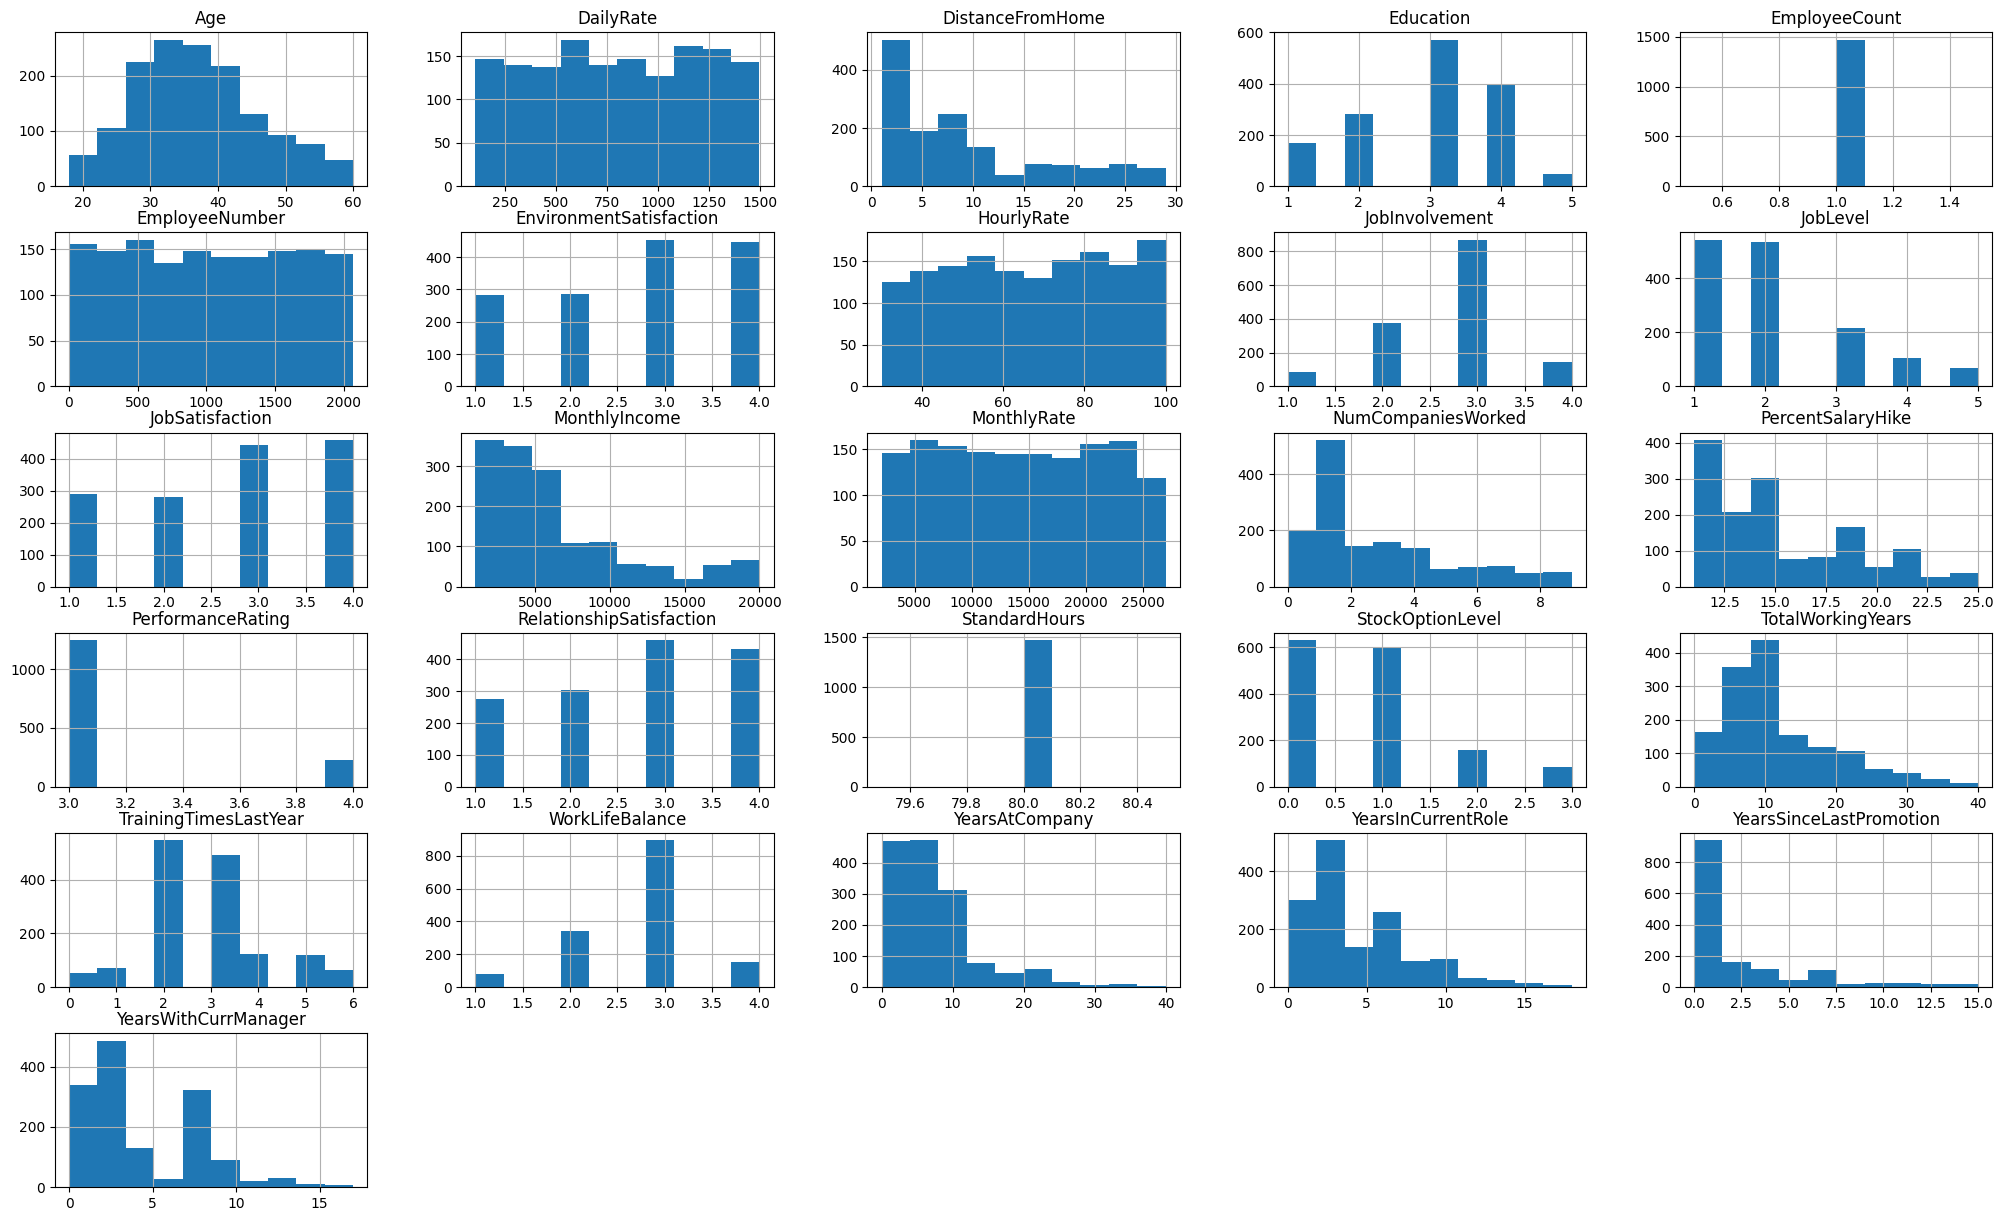

In [ ]:
df.hist(figsize=(25,15))
plt.show()

In [ ]:
num_features = df.select_dtypes('int')[df.columns[df.nunique() > 10]].columns.to_list()
cat_features = df[df.columns[df.nunique().between(3,10)]].columns.to_list()
bin_features = df[df.columns[df.nunique() == 2]].columns.to_list()
useless_features = df[df.columns[df.nunique() == 1]].columns

df.drop(columns=useless_features, inplace=True)

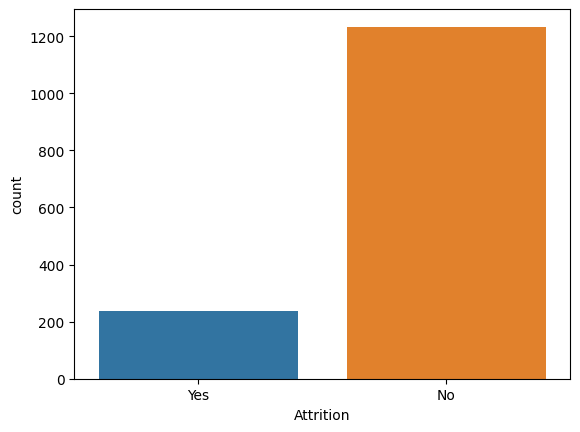

In [ ]:
sns.countplot(x=target)
plt.show()
plt.show()

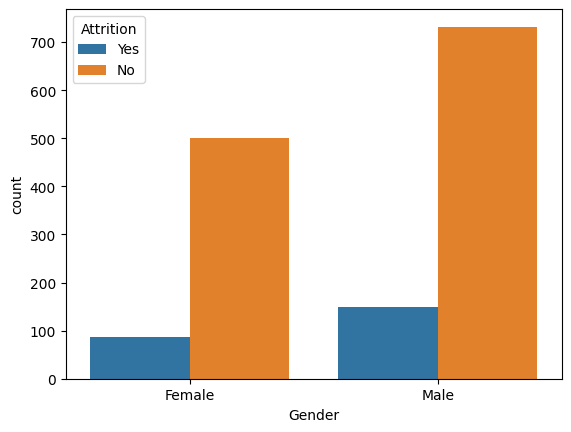

In [ ]:
sns.countplot(x=df['Gender'], hue=target)
plt.show()

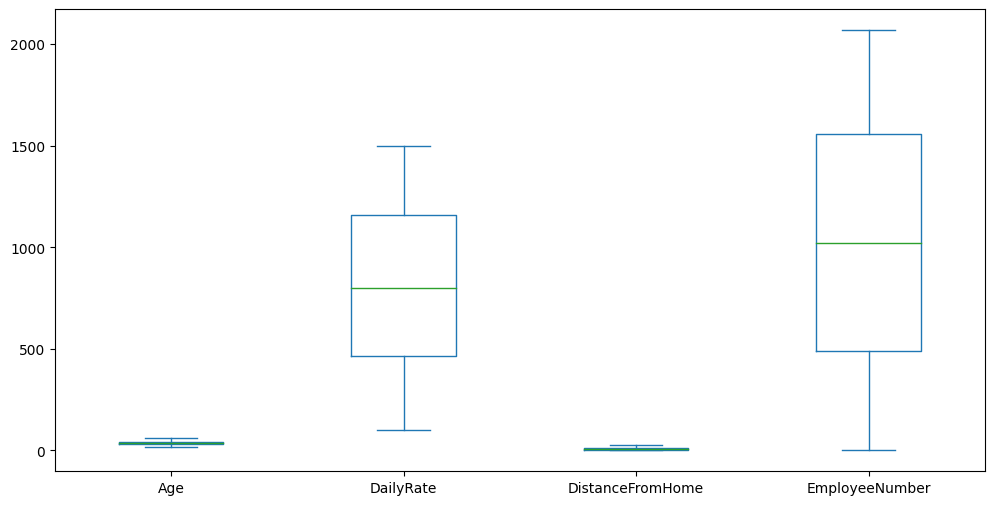

In [ ]:
df[num_features[:4]].plot(kind='box',figsize=(12,6))
plt.show()

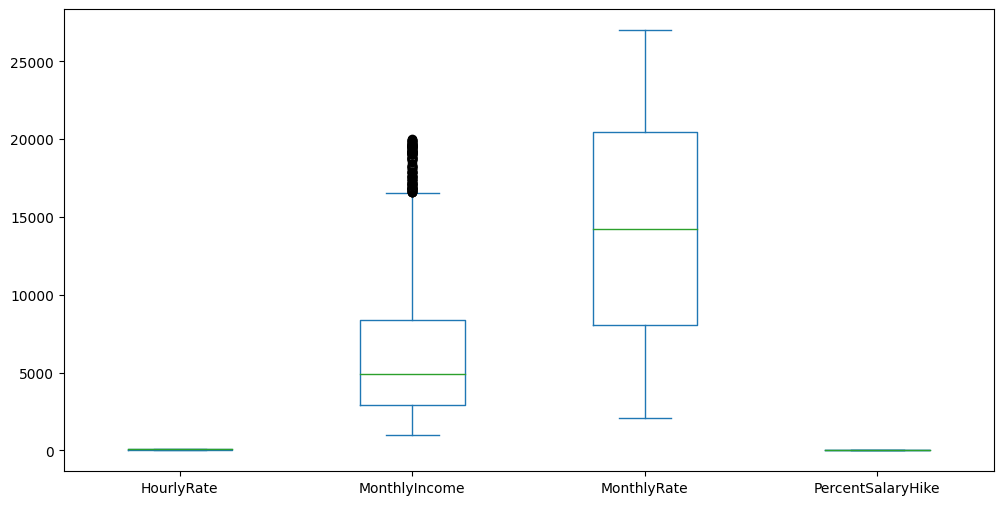

In [ ]:
df[num_features[4:8]].plot(kind='box', figsize=(12,6))
plt.show()

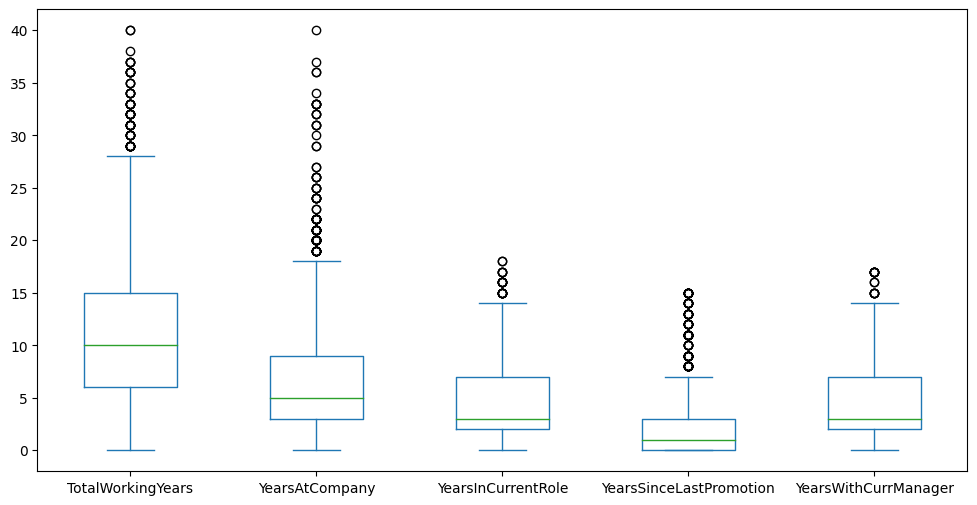

In [ ]:
df[num_features[8:]].plot(kind='box', figsize=(12,6))
plt.show()

##functions

####*DataPipeline*

In [ ]:
quant_features = cat_features + bin_features

In [ ]:
class DataPipeline(BaseEstimator, TransformerMixin):

  def __init__(self, num_features):

    self.num_features = num_features


    self.quantile_99 = {}
    self.median = {}


  def fit(self, df, y=None):

    for num_col in self.num_features:
      quan_99 = df[num_col].quantile(q=0.99)
      quan_3 = df[num_col].quantile(q=0.75)
      quan_1 = df[num_col].quantile(q=0.25)
      iqr = 1.5 * (quan_3 - quan_1)
      if quan_99 > quan_3 + iqr:
        self.quantile_99[num_col] = quan_99
        self.median[num_col] = df[num_col].median()

    return self

  def transform(self, df, y=None):

    for num_col in self.num_features:
      if num_col in self.quantile_99.keys():
        df.loc[df[num_col] > self.quantile_99[num_col], num_col] = self.median[num_col]

    return df


####*get_metrics and run_experiment*

In [ ]:
def get_metrics(report):
    f1_macro = report['macro avg']['f1-score']
    f1_0 = report['No']['f1-score']
    f1_1 = report['Yes']['f1-score']
    return f1_macro, f1_0, f1_1




def run_experiment(X_train, X_test, y_train, y_test, method='not', as_return='None'):

  assert method in ['not', 'over', 'under', 'tomek', 'smote', 'allknn', 'adasyn'], 'method not found'
  assert as_return in ['None', 'get_score'], 'not found'


  lr_model = LogisticRegression()
  tree_model = DecisionTreeClassifier()
  rf_model = RandomForestClassifier()
  g_model = GradientBoostingClassifier()

  model_dict = {'LogisticRegression': lr_model,
                'DecisionTreeClassifier': tree_model,
                'RandomForestClassifier': rf_model,
                'GradientBoosting': g_model
                }


  results = pd.DataFrame()


  for key, value in model_dict.items():

    value.fit(X_train, y_train)
    pred_train = value.predict(X_train)
    pred_test = value.predict(X_test)


    report_train = classification_report(y_train, pred_train, output_dict=True)
    report_test = classification_report(y_test, pred_test, output_dict=True)
    f1_macro_train, f1_0_train, f1_1_train = get_metrics(report_train)
    f1_macro_test, f1_0_test, f1_1_test = get_metrics(report_test)


    stata = {'model' : key,
        'f1_macro_train' : f1_macro_train,
             'f1_macro_test' : f1_macro_test,
             'f1_0_train' : f1_0_train,
             'f1_0_test' : f1_0_test,
             'f1_1_train' : f1_1_train,
             'f1_1_test' : f1_1_test,
             'method' : method
    }

    results = results.append(stata, ignore_index=True)

  return results

In [ ]:
!pip install category_encoders

####*converter for quantity features*


In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.count import CountEncoder

def converter(X, cat_bin_col, method='one_hot_encoder'):

  assert method in ['one_hot_encoder', 'label_encoder', 'count_encoder'], 'method not found'

  X.columns = X.columns.astype(str)

  if method == 'one_hot_encoder':
      dummies = pd.get_dummies(X[cat_bin_col], prefix=cat_bin_col)
      return dummies

  elif method == 'label_encoder':
    le = LabelEncoder()
    labels = le.fit_transform(X[cat_bin_col])
    return pd.Series(labels)

  elif method == 'count_encoder':
    X[cat_bin_col] = X[cat_bin_col].astype('str')
    ce = CountEncoder(handle_unknown=-1)
    labels = ce.fit_transform(X[cat_bin_col])
    return labels


####*run_experiment*

In [ ]:
def run_experiment(X_train, X_test, y_train, y_test, model, meth='not'):
    assert meth in ['not', 'over', 'under', 'tomek', 'smote', 'allknn', 'adasyn'], 'Неправильный метод сэмплирования'


    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    report_train = classification_report(y_train, pred_train, output_dict=True)
    report_test = classification_report(y_test, pred_test, output_dict=True)
    f1_macro_train, f1_0_train, f1_1_train = get_metrics(report_train)
    f1_macro_test, f1_0_test, f1_1_test = get_metrics(report_test)

    stata = {
        f'f1_macro_train': f1_macro_train,
        f'f1_macro_test': f1_macro_test,
        f'f1_0_train': f1_0_train,
        f'f1_0_test': f1_0_test,
        f'f1_1_train': f1_1_train,
        f'f1_1_test': f1_1_test,
        f'method': meth
    }

    return stata

####*CustomCountEncoder and CustomLabelEncoder*

In [ ]:
class CustomCountEncoder(BaseEstimator, TransformerMixin):

  def __init__(self, c_cols):

    self.c_cols = c_cols

  def fit(self, X, y=None):

    self.ce = CountEncoder(handle_unknown=-1)
    return self

  def transform(self, X, y=None):
    for col in X[self.c_cols]:
      X[col] = self.ce.fit_transform(X[col])
    return X



class CustomLabelEncoder(BaseEstimator, TransformerMixin):

  def __init__(self, c_cols):
    self.c_cols = c_cols


  def fit(self, X, y=None):
    self.le = LabelEncoder()
    return self

  def transform(self, X, y=None):

    for col in X[self.c_cols]:
      X[col] = self.le.fit_transform(X[col])

    return X


####*qual_converter*

In [ ]:
def qual_converter(df, num_col, method='log'):
  assert method in ['log', 'binning'], 'not found'

  df = df.copy()

  if method == 'log':
    df[num_col] = np.log(df[num_col])
    return df

  elif method == 'binning':
    df[num_col] = pd.cut(df[num_col], bins=3, labels=False)
    return df


####*balanced_df_by_target*

In [ ]:
from imblearn.under_sampling import TomekLinks, AllKNN
from imblearn.over_sampling import SMOTE, ADASYN


def balanced_df_by_target(df, target_idx, method='over'):
  assert method in ['over', 'under', 'tomek', 'smote', 'allknn', 'adasyn'], 'method not found'


  target_counts = df[target_idx].value_counts()

  sorted_target_counts = sorted(target_counts.items(), key = lambda x:x[1], reverse=True)

  major_class_name = sorted_target_counts[0][0]
  minor_class_name = sorted_target_counts[1][0]

  disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

  if method == 'over':
    for el in range(disbalance_coeff):
      sample = df[df[target_idx]== minor_class_name].sample(target_counts[minor_class_name])
      df = df.append(sample, ignore_index=True)

  elif method == 'under':
    df_1 = df.copy()
    df = df_1[df_1[target_idx] == minor_class_name]
    tmp = df_1[df_1[target_idx] == major_class_name]

    df = df.append(tmp.iloc[np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])], ignore_index=True)

  elif method == 'tomek':
    tl = TomekLinks()
    X_tomek, y_tomek = tl.fit_resample(df.drop(columns=target_idx), df[target_idx])
    df = pd.concat([X_tomek,y_tomek], axis=1)

  elif method == 'smote':
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(df.drop(columns=target_idx), df[target_idx])
    df = pd.concat([X_smote, y_smote], axis=1)

  elif method == 'allknn':
    allknn = AllKNN()
    X_knn, y_knn = allknn.fit_resample(df.drop(columns=target_idx), df[target_idx])
    df = pd.concat([X_knn, y_knn], axis=1)

  elif method == 'adasyn':
    adasyn = ADASYN()
    X_adasyn, y_adasyn = adasyn.fit_resample(df.drop(columns=target_idx), df[target_idx])
    df = pd.concat([X_adasyn, y_adasyn], axis=1)

  return df


####*feats*

In [ ]:
def feats(one_hot, count_en, label_en, num_features):

  col_transf_list = []

  if num_features:
    num_transformer = make_pipeline(
      StandardScaler())
    num_tuple = ('num', num_transformer, num_features)
    col_transf_list.append(num_tuple)

  if count_en:
    for_countencoder_transformer = make_pipeline(
      CustomCountEncoder(count_en),
      StandardScaler()
  )
    countencoder_tuple = ('count', for_countencoder_transformer, count_en)
    col_transf_list.append(countencoder_tuple)

  if label_en:
    for_label_encoder_transformer = make_pipeline(
      CustomLabelEncoder(label_en)
  )
    label_encoder_tuple = ('label', for_label_encoder_transformer, label_en)
    col_transf_list.append(label_encoder_tuple)

  if for_one_hot:
    for_one_hot_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
  )
    one_hot_tuple = ('one_hot', for_one_hot_transformer, one_hot)
    col_transf_list.append(one_hot_tuple)



  features = ColumnTransformer(col_transf_list)

  return features


####*searh best balance*

In [ ]:
def search_best_balance(df_for_balancing, model, target, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

  method_list = ['over', 'under', 'tomek', 'smote', 'allknn', 'adasyn']

  results = pd.DataFrame()


  stata_not = run_experiment(X_train,X_test, y_train, y_test, model, meth='not')
  results = results.append(stata_not, ignore_index=True)

  for method in method_list:

    df_balanced = balanced_df_by_target(df_for_balancing, target_name, method=method)

    X_train_balanced = df_balanced.drop(columns=target_name)
    y_train_balanced =df_balanced[target_name]

    stata = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, model=model, meth=method)
    results = results.append(stata, ignore_index=True)

  return results

####*search_best_score_for_quant_features*

In [ ]:
converter_list = ['one_hot_encoder', 'label_encoder', 'count_encoder']

df.columns = df.columns.astype(str)

def search_best_score_for_quant_features(data, target, quant_features=quant_features, num_features=num_features,model='logreg', converter_list=converter_list):
  assert model in  ['logreg', 'dectree', 'gradboost', 'ranfor'], 'model not found'


  for_one_hot = []
  for_labelencoder = []
  for_countencoder = []

  for col in quant_features:
    score_dict = {}
    for con in converter_list:
      converter_data = converter(data, col, method=con)
      if con == 'label_encoder':
        tmp = data[num_features]
        tmp[f'{col}_labels'] = converter_data
      else:
        tmp = pd.concat([data[num_features], converter_data], axis=1)



      if model == 'logreg':
        score = log_reg(tmp, target)
      elif model == 'dectree':
        score = dec_tree(tmp, target)
      elif model == 'ranfor':
        score = rand_for(tmp, target)
      elif model == 'gradboost':
        score = grad_boost(tmp, target)
      score_dict[con] = score


    best_results = sorted(score_dict.items(), key=lambda x:x[1], reverse=True)[0]



    if best_results[0] == 'one_hot_encoder':
      for_one_hot.append(col)
    elif best_results[0] == 'label_encoder':
      for_labelencoder.append(col)
    elif best_results[0] == 'count_encoder':
      for_countencoder.append(col)

  return for_one_hot, for_labelencoder, for_countencoder

####*search_best_score_for_num_features*

In [ ]:
qual_converter_list = ['log', 'binning']


def search_best_score_for_num_features(data, target, num_features=num_features, qual_converter_list=qual_converter_list,model='logreg',  report=True):
  assert model in  ['logreg', 'dectree', 'gradboost', 'ranfor'], 'model not found'

  log_list = []
  binning_list = []
  df_tmp = data[num_features].copy()
  changed_num_features = []
  results_list = []
  base_result = None

  if model == 'logreg':
    base_result = log_reg(df_tmp, target)
  elif model == 'dectree':
    base_result = dec_tree(df_tmp, target)
  elif model == 'ranfor':
    base_result = rand_for(df_tmp, target)
  elif model == 'gradboost':
    base_result = grad_boost(df_tmp, target)

  print(base_result)
  best_result = base_result.copy()
  print(best_result)


  for col in num_features:
    score_dict = {}
    basic_col = df_tmp[col]
    for met in qual_converter_list:
      if met == 'log':
        if 0 in df_tmp[col].unique():
          continue
      df_tmp = qual_converter(df_tmp, col, method=met)


      if model =='logreg':
        score_dict[col] = log_reg(df_tmp,target)
      elif model == 'dectree':
        score_dict[col] = dec_tree(df_tmp,target)
      elif model == 'ranfor':
        score_dict[col] = rand_for(df_tmp,target)
      elif model == 'gradboost':
        score_dict[col] = grad_boost(df_tmp, target)


      if report:
        print(f'{col}: {(score_dict[col], met)}')
    results = list(max(score_dict.items(), key=lambda x:x[1]))
    results.append(met)


    if results[1] > best_result:
      best_result = results[1]
    results_list.append(results)

  best_result = base_result

  for el in results_list:

    if el[1] > best_result:
      best_result = el[1]
      if el[2] == 'log':
        log_list.append(el[0])
      elif el[2] == 'binning':
        binning_list.append(el[0])
    else:
      changed_num_features.append(el[0])


  return changed_num_features, log_list, binning_list

###Search best balance

In [ ]:
def search_best_balance(df_for_balancing,model, target, X_train, X_test, y_train, y_test):

  method_list = ['over', 'under', 'tomek', 'smote', 'allknn', 'adasyn']

  results = pd.DataFrame()


  stata_not = run_experiment(X_train,X_test, y_train, y_test, model, meth='not')
  results = results.append(stata_not, ignore_index=True)

  for method in method_list:
    df_balanced = balanced_df_by_target(df_for_balancing, target_name, method=method)

    X_train_balanced = df_balanced.drop(columns=target_name)
    y_train_balanced =df_balanced[target_name]

    stata = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, model=model, meth=method)
    results = results.append(stata, ignore_index=True)

  return results

In [ ]:
quant_features

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'Gender',
 'OverTime',
 'PerformanceRating',
 'Attrition']

In [ ]:
quant_features.remove('Attrition')

##Logistic Regression

In [ ]:
def log_reg(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3, random_state=42, stratify= y)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model = LogisticRegression()
  model.fit(X_train, y_train)

  return model.score(X_test, y_test)


In [ ]:
num_features = df.select_dtypes(int).columns
target = df['Attrition']

In [ ]:
for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df,target, num_features=num_features)

In [ ]:
df_tmp = df[num_features].copy()

In [ ]:
for_labelencoder

['Department',
 'EducationField',
 'JobRole',
 'StockOptionLevel',
 'WorkLifeBalance']

In [ ]:
for_one_hot

['BusinessTravel',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'TrainingTimesLastYear',
 'Gender',
 'OverTime',
 'PerformanceRating']

In [ ]:
for_countencoder

['MaritalStatus', 'NumCompaniesWorked', 'RelationshipSatisfaction']

In [ ]:
num_features, log_list, binning_list = search_best_score_for_num_features(df, target)

0.8435374149659864
0.8435374149659864
Age: (0.8390022675736961, 'log')
Age: (0.8435374149659864, 'binning')
DailyRate: (0.8435374149659864, 'log')
DailyRate: (0.8435374149659864, 'binning')
DistanceFromHome: (0.8435374149659864, 'log')
DistanceFromHome: (0.8412698412698413, 'binning')
EmployeeNumber: (0.8435374149659864, 'log')
EmployeeNumber: (0.8435374149659864, 'binning')
HourlyRate: (0.8435374149659864, 'log')
HourlyRate: (0.8435374149659864, 'binning')
MonthlyIncome: (0.8367346938775511, 'log')
MonthlyIncome: (0.8412698412698413, 'binning')
MonthlyRate: (0.8412698412698413, 'log')
MonthlyRate: (0.8412698412698413, 'binning')
PercentSalaryHike: (0.8412698412698413, 'log')
PercentSalaryHike: (0.8435374149659864, 'binning')
TotalWorkingYears: (0.8435374149659864, 'binning')
YearsAtCompany: (0.8435374149659864, 'binning')
YearsInCurrentRole: (0.8412698412698413, 'binning')
YearsSinceLastPromotion: (0.8412698412698413, 'binning')
YearsWithCurrManager: (0.8412698412698413, 'binning')


In [ ]:
features = feats(for_one_hot, for_countencoder, for_labelencoder, num_features)

In [ ]:
features

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'EmployeeNumber', 'HourlyRate',
                                  'MonthlyIncome', 'MonthlyRate',
                                  'PercentSalaryHike', 'TotalWorkingYears',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager']),
                                ('count',
                                 Pipeline(steps=[('cus...
                                                                             'WorkLifeBalance']))]),
                                 ['Department', 'EducationField', 'JobRole',
                                  'StockOptionLevel', 'WorkLifeBalance']),
                                ('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BusinessTravel', 'Education',
                                  'EnvironmentSatisfaction', 'JobInvolvement',
                                  'JobLevel', 'JobSatisfaction',
                                  'TrainingTimesLastYear', 'Gender', 'OverTime',
                                  'PerformanceRating'])])

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Attrition'), df['Attrition'],
                                                    test_size=0.3, random_state=42, stratify=df['Attrition'])

In [ ]:
pipe.fit(X_train)

Pipeline(steps=[('datapipeline',
                 DataPipeline(num_features=['Age', 'DailyRate',
                                            'DistanceFromHome',
                                            'EmployeeNumber', 'HourlyRate',
                                            'MonthlyIncome', 'MonthlyRate',
                                            'PercentSalaryHike',
                                            'TotalWorkingYears',
                                            'YearsAtCompany',
                                            'YearsInCurrentRole',
                                            'YearsSinceLastPromotion',
                                            'YearsWithCurrManager'])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipe...
                                                                                              'WorkLifeBalance']))]),
                                                  ['Department',
                                                   'EducationField', 'JobRole',
                                                   'StockOptionLevel',
                                                   'WorkLifeBalance']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'TrainingTimesLastYear',
                                                   'Gender', 'OverTime',
                                                   'PerformanceRating'])]))])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
X_train.shape

(1029, 59)

In [ ]:
df_for_balancing = pd.DataFrame(np.c_[X_train,y_train.values])

In [ ]:
df_for_balancing.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.958919,-0.413973,-0.036578,0.301201,-0.547908,-0.872183,-1.009049,2.691496,-1.389948,-1.058797,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,No
1,-0.430695,1.17607,0.699024,-0.723217,-0.449557,1.640058,1.404772,-0.877511,0.548257,0.065947,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes
2,1.643324,1.296833,0.208623,-0.335917,0.829007,-0.736552,1.017664,1.318801,-0.282403,-0.308968,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No
3,-1.085648,-0.549831,-0.894779,1.064066,1.074884,-0.865822,-1.130107,-0.602972,-0.697732,-0.496425,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,No
4,-0.321536,-1.274408,-0.894779,-1.336862,0.484778,-0.94511,-0.435997,0.769723,-0.697732,-0.496425,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No


In [ ]:
dict_report = {}

In [ ]:
target_name = 59

In [ ]:
method_list = ['over', 'under', 'tomek', 'smote', 'allknn', 'adasyn']

results = pd.DataFrame()




In [ ]:
stata_not = run_experiment(X_train,X_test, y_train, y_test, LogisticRegression(), meth='not')
results = results.append(stata_not, ignore_index=True)

In [ ]:
results_1 = search_best_balance(df_for_balancing, LogisticRegression(), target_name, X_train,
                                X_test, y_train, y_test)

In [ ]:
results_1['drop_corr_feature'] = ['not_drop'] * results_1.shape[0]
results_1

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
0,0.728682,0.724920,0.933555,0.902069,0.523810,0.547771,not,not_drop
1,0.797401,0.614741,0.797401,0.776358,0.797401,0.453125,over,not_drop
2,0.786143,0.514938,0.786787,0.651327,0.785498,0.378549,under,not_drop
3,0.746198,0.715368,0.934256,0.894150,0.558140,0.536585,tomek,not_drop
4,0.809332,0.561763,0.806128,0.713805,0.812536,0.409722,smote,not_drop
5,0.812767,0.644840,0.927228,0.821212,0.698305,0.468468,allknn,not_drop
6,0.810784,0.577519,0.813056,0.726968,0.808511,0.428070,adasyn,not_drop


In [ ]:
dict_report['results_1'] = results_1

Попробуем удалить корреллирующие признаки

In [ ]:
#YearsWithCurrManager, PercentSalaryHike, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, TotalWorkingYears,

In [ ]:
df_check = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike'])

correlation_features = ['YearsWithCurrManager', 'PercentSalaryHike', ]
candidates_for_drop = ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsAtCompany']

iterations = len(candidates_for_drop)
target = df_check['Attrition']


for cicle in range(iterations+1):
  print(cicle)

  if cicle > 0:
    correlation_features.append(candidates_for_drop[cicle-1])

    df_check = df.drop(columns=correlation_features)

  num_features_check = df_check.select_dtypes(int).columns.to_list()

  for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_check, target, num_features=num_features_check)
  #print(for_one_hot, for_labelencoder, for_countencoder)

  new_features_check, log_list, binning_list = search_best_score_for_num_features(df_check,target, num_features=num_features_check, report=False)

  features_df = pd.DataFrame()
  #по какой-то причине

  if binning_list:
    drop_binning_features = df_check[binning_list].copy()
    binning_array = np.array(list(map(lambda x: pd.cut(df_check[x], bins=3, labels=False), binning_list))).T
    df_check.drop(columns=binning_list, inplace=True)
    binning_df = pd.DataFrame(columns=binning_list)
    binning_df[binning_list] = binning_array
    features_df = pd.concat([features_df, binning_df], axis=1)

  if log_list:

    drop_log_features = df_check[log_list].copy()
    log_array = np.array(list(map(lambda x: np.log(df_check[x]),log_list))).T
    df_check.drop(columns=log_list, inplace=True)
    log_df = pd.DataFrame(columns=log_list)
    log_df[log_list] = log_array
    features_df = pd.concat([features_df, log_df], axis=1)



  X_train, X_test, y_train, y_test = train_test_split(df_check.drop(columns='Attrition'), df_check['Attrition'],
                                                    test_size=0.3, random_state=42, stratify=df_check['Attrition'])

  X_train_index = X_train.index.to_list()
  X_test_index = X_test.index.to_list()

  feat_columns = features_df.columns.to_list()

  X_train_feat = pd.merge(X_train, features_df, left_index=True, right_index=True)
  X_test_feat = pd.merge(X_test, features_df, left_index=True, right_index=True)

  X_train_feat =  X_train_feat[feat_columns]
  X_test_feat = X_test_feat[feat_columns]



  features = feats(for_one_hot, for_countencoder, for_labelencoder, new_features_check)

  pipe = make_pipeline(
    DataPipeline(num_features=new_features_check),
    features)

  pipe.fit(X_train)


  X_train = pipe.transform(X_train)
  X_test = pipe.transform(X_test)

  X_train = pd.DataFrame(X_train, index=X_train_index)
  X_test = pd.DataFrame(X_test, index=X_test_index)
  lower_threshold = X_train.shape[1]
  upper_threshold = lower_threshold + X_train_feat.shape[1]
  columns={X_train_feat.columns[enum]: col for enum, col in enumerate(range(lower_threshold, upper_threshold))}
  X_train_feat.rename(columns=columns,inplace=True)
  X_test_feat.rename(columns=columns, inplace=True)

  X_train = pd.merge(X_train, X_train_feat, left_index=True, right_index=True)
  X_test = pd.merge(X_test, X_test_feat, left_index=True, right_index=True)


  df_for_balancing = pd.concat([X_train, y_train],axis=1)
  df_for_balancing.rename(columns={'Attrition': df_for_balancing.shape[1] - 1}, inplace=True)

  target_name =  df_for_balancing.shape[1] - 1


  dict_report[f'results_{cicle+2}'] = search_best_balance(df_for_balancing, LogisticRegression(), target_name, X_train,
                                X_test, y_train, y_test)
  if cicle == 0:
    dict_report[f'results_{cicle+2}']['drop_corr_feature'] = 'YearsWithCurrManager, PercentSalaryHike'
  else:
    dict_report[f'results_{cicle+2}']['drop_corr_feature'] = candidates_for_drop[cicle-1]



0
0.8412698412698413
0.8412698412698413
1
0.8412698412698413
0.8412698412698413
2
0.8412698412698413
0.8412698412698413
3
0.8412698412698413
0.8412698412698413
4
0.8390022675736961
0.8390022675736961


In [ ]:
dict_report

{'results_1':    f1_macro_train  f1_macro_test  f1_0_train  f1_0_test  f1_1_train  \
 0        0.728682       0.724920    0.933555   0.902069    0.523810   
 1        0.797401       0.614741    0.797401   0.776358    0.797401   
 2        0.786143       0.514938    0.786787   0.651327    0.785498   
 3        0.746198       0.715368    0.934256   0.894150    0.558140   
 4        0.809332       0.561763    0.806128   0.713805    0.812536   
 5        0.812767       0.644840    0.927228   0.821212    0.698305   
 6        0.810784       0.577519    0.813056   0.726968    0.808511   
 
    f1_1_test  method drop_corr_feature  
 0   0.547771     not          not_drop  
 1   0.453125    over          not_drop  
 2   0.378549   under          not_drop  
 3   0.536585   tomek          not_drop  
 4   0.409722   smote          not_drop  
 5   0.468468  allknn          not_drop  
 6   0.428070  adasyn          not_drop  ,
 'results_2':    f1_macro_train  f1_macro_test  f1_0_train  f1_0_test  f

In [ ]:
df_results = pd.concat(dict_report.values(), axis=0)
df_results.head(5)

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
0,0.728682,0.724920,0.933555,0.902069,0.523810,0.547771,not,not_drop
1,0.797401,0.614741,0.797401,0.776358,0.797401,0.453125,over,not_drop
2,0.786143,0.514938,0.786787,0.651327,0.785498,0.378549,under,not_drop
3,0.746198,0.715368,0.934256,0.894150,0.558140,0.536585,tomek,not_drop
4,0.809332,0.561763,0.806128,0.713805,0.812536,0.409722,smote,not_drop


In [ ]:
df_results.sort_values(by='f1_1_test', ascending=False).head(10)

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
0,0.744976,0.758815,0.934819,0.916324,0.555133,0.601307,not,"YearsWithCurrManager, PercentSalaryHike"
0,0.740263,0.750908,0.934372,0.913580,0.546154,0.588235,not,TotalWorkingYears
3,0.744117,0.748044,0.930612,0.908587,0.557621,0.587500,tomek,"YearsWithCurrManager, PercentSalaryHike"
3,0.745388,0.732832,0.931075,0.897616,0.559701,0.568047,tomek,TotalWorkingYears
0,0.762414,0.730349,0.939276,0.899721,0.585551,0.560976,not,YearsSinceLastPromotion
3,0.761145,0.720705,0.936738,0.891702,0.585551,0.549708,tomek,YearsSinceLastPromotion
0,0.728682,0.724920,0.933555,0.902069,0.523810,0.547771,not,not_drop
0,0.794263,0.713818,0.947016,0.883191,0.641509,0.544444,not,YearsAtCompany
3,0.746198,0.715368,0.934256,0.894150,0.558140,0.536585,tomek,not_drop
3,0.811502,0.698003,0.946746,0.871942,0.676259,0.524064,tomek,YearsAtCompany


#####Train model

In [ ]:
model = LogisticRegression()

df_train = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike'])

num_features = df_train.select_dtypes(int).columns.to_list()


for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_train, target, num_features=num_features)
num_features, log_list, binning_list = search_best_score_for_num_features(df_train,target, num_features=num_features)


log_list, binning_list

0.8412698412698413
0.8412698412698413
Age: (0.8435374149659864, 'log')
Age: (0.8435374149659864, 'binning')
DailyRate: (0.8435374149659864, 'log')
DailyRate: (0.8435374149659864, 'binning')
DistanceFromHome: (0.8435374149659864, 'log')
DistanceFromHome: (0.8435374149659864, 'binning')
EmployeeNumber: (0.8458049886621315, 'log')
EmployeeNumber: (0.8458049886621315, 'binning')
HourlyRate: (0.8435374149659864, 'log')
HourlyRate: (0.8412698412698413, 'binning')
MonthlyIncome: (0.8412698412698413, 'log')
MonthlyIncome: (0.8435374149659864, 'binning')
MonthlyRate: (0.8435374149659864, 'log')
MonthlyRate: (0.8435374149659864, 'binning')
TotalWorkingYears: (0.8435374149659864, 'binning')
YearsAtCompany: (0.8435374149659864, 'binning')
YearsInCurrentRole: (0.8390022675736961, 'binning')
YearsSinceLastPromotion: (0.8412698412698413, 'binning')


([], ['Age', 'EmployeeNumber'])

In [ ]:
for_one_hot, for_labelencoder, for_countencoder

(['BusinessTravel',
  'Education',
  'EnvironmentSatisfaction',
  'JobLevel',
  'JobSatisfaction',
  'NumCompaniesWorked',
  'RelationshipSatisfaction',
  'Gender',
  'OverTime',
  'PerformanceRating'],
 ['EducationField', 'JobInvolvement', 'JobRole'],
 ['Department',
  'MaritalStatus',
  'StockOptionLevel',
  'TrainingTimesLastYear',
  'WorkLifeBalance'])

In [ ]:
drop_binning_features = df_train[binning_list].copy()
binning_array = np.array(list(map(lambda x: pd.cut(df_train[x], bins=3, labels=False), binning_list))).T
df_train.drop(columns=binning_list, inplace=True)
binning_df = pd.DataFrame(columns=binning_list)
binning_df[binning_list] = binning_array

In [ ]:
X = df_train.drop(columns=['Attrition'])
y = df_train['Attrition']

X = pd.merge(X, binning_df, left_index=True, right_index=True)

In [ ]:
X

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Age,EmployeeNumber
0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,...,1,0,8,0,1,6,4,0,1,0
1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,...,4,1,10,3,3,10,7,1,2,0
2,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,...,2,0,7,3,3,0,0,0,1,0
3,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,...,3,0,8,3,3,8,7,3,1,0
4,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,...,4,1,6,3,3,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,...,3,1,17,3,3,5,2,0,1,2
1466,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,...,1,1,9,5,3,7,7,1,1,2
1467,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,...,2,1,6,0,3,6,2,0,0,2
1468,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,...,4,0,17,3,2,9,6,0,2,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3, random_state=42, stratify=y)


In [ ]:
features = feats(for_one_hot, for_countencoder, for_labelencoder,num_features)
features

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['DailyRate', 'DistanceFromHome', 'HourlyRate',
                                  'MonthlyIncome', 'MonthlyRate',
                                  'TotalWorkingYears', 'YearsAtCompany',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion']),
                                ('count',
                                 Pipeline(steps=[('customcountencoder',
                                                  CustomCountEncoder(c_cols=['Department',
                                                                             'MaritalS...
                                                  CustomLabelEncoder(c_cols=['EducationField',
                                                                             'JobInvolvement',
                                                                             'JobRole']))]),
                                 ['EducationField', 'JobInvolvement',
                                  'JobRole']),
                                ('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BusinessTravel', 'Education',
                                  'EnvironmentSatisfaction', 'JobLevel',
                                  'JobSatisfaction', 'NumCompaniesWorked',
                                  'RelationshipSatisfaction', 'Gender',
                                  'OverTime', 'PerformanceRating'])])

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)

pipe.fit(X_train)

Pipeline(steps=[('datapipeline',
                 DataPipeline(num_features=['DailyRate', 'DistanceFromHome',
                                            'HourlyRate', 'MonthlyIncome',
                                            'MonthlyRate', 'TotalWorkingYears',
                                            'YearsAtCompany',
                                            'YearsInCurrentRole',
                                            'YearsSinceLastPromotion'])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['DailyRate',
                                                   'Di...
                                                                   CustomLabelEncoder(c_cols=['EducationField',
                                                                                              'JobInvolvement',
                                                                                              'JobRole']))]),
                                                  ['EducationField',
                                                   'JobInvolvement',
                                                   'JobRole']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobLevel',
                                                   'JobSatisfaction',
                                                   'NumCompaniesWorked',
                                                   'RelationshipSatisfaction',
                                                   'Gender', 'OverTime',
                                                   'PerformanceRating'])]))])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       863
         Yes       0.71      0.39      0.50       166

    accuracy                           0.88      1029
   macro avg       0.80      0.68      0.72      1029
weighted avg       0.86      0.88      0.86      1029



In [ ]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

          No       0.92      0.91      0.92       370
         Yes       0.56      0.61      0.58        71

    accuracy                           0.86       441
   macro avg       0.74      0.76      0.75       441
weighted avg       0.86      0.86      0.86       441



##Decision Tree

In [ ]:
def dec_tree(df, y):


  X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                      test_size=0.3, random_state=42, stratify=y)

  model = DecisionTreeClassifier()

  model.fit(X_train, y_train)

  return model.score(X_test, y_test)



In [ ]:
num_features = df.select_dtypes(int).columns
target = df['Attrition']


for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df, target, model='dectree', num_features=num_features)

In [ ]:
for_one_hot, for_labelencoder, for_countencoder

(['JobInvolvement',
  'NumCompaniesWorked',
  'RelationshipSatisfaction',
  'OverTime',
  'PerformanceRating'],
 ['BusinessTravel',
  'Education',
  'EducationField',
  'EnvironmentSatisfaction',
  'MaritalStatus',
  'StockOptionLevel',
  'Gender'],
 ['Department',
  'JobLevel',
  'JobRole',
  'JobSatisfaction',
  'TrainingTimesLastYear',
  'WorkLifeBalance'])

In [ ]:
num_features, log_list, binning_list = search_best_score_for_num_features(df, target, num_features=num_features, model='dectree')

0.7301587301587301
0.7301587301587301
Age: (0.7369614512471655, 'log')
Age: (0.7165532879818595, 'binning')
DailyRate: (0.7120181405895691, 'log')
DailyRate: (0.7188208616780045, 'binning')
DistanceFromHome: (0.7278911564625851, 'log')
DistanceFromHome: (0.7301587301587301, 'binning')
EmployeeNumber: (0.7278911564625851, 'log')
EmployeeNumber: (0.7369614512471655, 'binning')
HourlyRate: (0.7301587301587301, 'log')
HourlyRate: (0.7278911564625851, 'binning')
MonthlyIncome: (0.7142857142857143, 'log')
MonthlyIncome: (0.7278911564625851, 'binning')
MonthlyRate: (0.7233560090702947, 'log')
MonthlyRate: (0.7165532879818595, 'binning')
PercentSalaryHike: (0.7210884353741497, 'log')
PercentSalaryHike: (0.7256235827664399, 'binning')
TotalWorkingYears: (0.6984126984126984, 'binning')
YearsAtCompany: (0.7074829931972789, 'binning')
YearsInCurrentRole: (0.7256235827664399, 'binning')
YearsSinceLastPromotion: (0.6870748299319728, 'binning')
YearsWithCurrManager: (0.780045351473923, 'binning')


In [ ]:
log_list, binning_list

([], ['EmployeeNumber', 'YearsWithCurrManager'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Attrition'), target, test_size=0.3,
                                                    random_state=42, stratify=target)


In [ ]:
features = feats(for_one_hot, for_countencoder, for_labelencoder, num_features)

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)


In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
df_for_balancing = pd.DataFrame(np.c_[X_train,y_train.values])

In [ ]:
df_for_balancing

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-1.958919,-0.413973,-0.036578,-0.547908,-0.872183,-1.009049,2.691496,-1.389948,-1.058797,-0.91551,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No
1,-0.430695,1.17607,0.699024,-0.449557,1.640058,1.404772,-0.877511,0.548257,0.065947,0.547316,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes
2,1.643324,1.296833,0.208623,0.829007,-0.736552,1.017664,1.318801,-0.282403,-0.308968,-0.622945,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,No
3,-1.085648,-0.549831,-0.894779,1.074884,-0.865822,-1.130107,-0.602972,-0.697732,-0.496425,-0.622945,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
4,-0.321536,-1.274408,-0.894779,0.484778,-0.94511,-0.435997,0.769723,-0.697732,-0.496425,-0.33038,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.98837,0.841457,-0.281778,-1.728121,-0.257413,0.218407,-0.328433,-0.559289,-1.058797,-1.208076,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
1025,0.115099,0.501812,-0.894779,-1.678945,0.114038,0.691154,-0.053894,-0.005516,0.065947,0.839881,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,No
1026,-1.631442,-1.490774,-0.159178,1.419113,-0.895129,-1.04931,-0.053894,-0.974619,-0.496425,-0.33038,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,No
1027,-0.103218,-0.95489,-0.894779,0.386427,0.129714,0.70665,1.867879,0.548257,-1.058797,-1.208076,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,No


In [ ]:
target_name = df_for_balancing.columns[-1]
target_name

46

In [ ]:
results_2 = search_best_balance(df_for_balancing, DecisionTreeClassifier(max_depth=4), target_name, X_train,
                                X_test, y_train, y_test)

In [ ]:
results_2

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method
0,0.702099,0.556743,0.935730,0.885417,0.468468,0.228070,not
1,0.760385,0.598256,0.783172,0.814159,0.737598,0.382353,over
2,0.807854,0.531261,0.829268,0.785294,0.786441,0.277228,under
3,0.706552,0.571342,0.933105,0.886275,0.480000,0.256410,tomek
4,0.846093,0.649760,0.853672,0.853868,0.838513,0.445652,smote
5,0.743552,0.550000,0.913333,0.857143,0.573770,0.242857,allknn
6,0.831539,0.559744,0.845133,0.882199,0.817945,0.237288,adasyn


In [ ]:
results_2['drop_corr_feature'] = ['not_drop'] * results_2.shape[0]
results_2

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
0,0.702099,0.556743,0.935730,0.885417,0.468468,0.228070,not,not_drop
1,0.760385,0.598256,0.783172,0.814159,0.737598,0.382353,over,not_drop
2,0.807854,0.531261,0.829268,0.785294,0.786441,0.277228,under,not_drop
3,0.706552,0.571342,0.933105,0.886275,0.480000,0.256410,tomek,not_drop
4,0.846093,0.649760,0.853672,0.853868,0.838513,0.445652,smote,not_drop
5,0.743552,0.550000,0.913333,0.857143,0.573770,0.242857,allknn,not_drop
6,0.831539,0.559744,0.845133,0.882199,0.817945,0.237288,adasyn,not_drop


In [ ]:
dict_reports_for_decision_tree = {}
dict_reports_for_decision_tree['results_1'] =  results_2

In [ ]:
results_2['drop_corr_feature'] = ['not'] * results_2.shape[0]

In [ ]:
df_check = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike'])

correlation_features = ['YearsWithCurrManager', 'PercentSalaryHike', ]
candidates_for_drop = ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsAtCompany']

iterations = len(candidates_for_drop)
target = df_check['Attrition']

for cicle in range(iterations+1):
  print(cicle)

  if cicle > 0:
    correlation_features.append(candidates_for_drop[cicle-1])

    df_check = df.drop(columns=correlation_features)

  num_features_check = df_check.select_dtypes(int).columns.to_list()

  for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_check, target, model='dectree', num_features=num_features_check)


  new_features_check, log_list, binning_list = search_best_score_for_num_features(df_check, target, num_features=num_features_check,model='dectree', report=False)

  features_df = pd.DataFrame()

  if binning_list:
    drop_binning_features = df_check[binning_list].copy()
    binning_array = np.array(list(map(lambda x: pd.cut(df_check[x], bins=3, labels=False), binning_list))).T
    df_check.drop(columns=binning_list, inplace=True)
    binning_df = pd.DataFrame(columns=binning_list)
    binning_df[binning_list] = binning_array
    features_df = pd.concat([features_df, binning_df], axis=1)

  if log_list:

    drop_log_features = df_check[log_list].copy()
    log_array = np.array(list(map(lambda x: np.log(df_check[x]),log_list))).T
    df_check.drop(columns=log_list, inplace=True)
    log_df = pd.DataFrame(columns=log_list)
    log_df[log_list] = log_array
    features_df = pd.concat([features_df, log_df], axis=1)



  X_train, X_test, y_train, y_test = train_test_split(df_check.drop(columns='Attrition'), df_check['Attrition'],
                                                    test_size=0.3, random_state=42, stratify=df_check['Attrition'])

  if features_df.shape[0] != 0 :

    X_train_index = X_train.index.to_list()
    X_test_index = X_test.index.to_list()

    feat_columns = features_df.columns.to_list()

    X_train_feat = pd.merge(X_train, features_df, left_index=True, right_index=True)
    X_test_feat = pd.merge(X_test, features_df, left_index=True, right_index=True)

    X_train_feat =  X_train_feat[feat_columns]
    X_test_feat = X_test_feat[feat_columns]



  features = feats(for_one_hot, for_countencoder, for_labelencoder, new_features_check)

  pipe = make_pipeline(
    DataPipeline(num_features=new_features_check),
    features)

  pipe.fit(X_train)


  X_train = pipe.transform(X_train)
  X_test = pipe.transform(X_test)

  if features_df.shape[0] != 0:
    X_train = pd.DataFrame(X_train, index=X_train_index)
    X_test = pd.DataFrame(X_test, index=X_test_index)
    lower_threshold = X_train.shape[1]
    upper_threshold = lower_threshold + X_train_feat.shape[1]
    columns={X_train_feat.columns[enum]: col for enum, col in enumerate(range(lower_threshold, upper_threshold))}
    X_train_feat.rename(columns=columns,inplace=True)
    X_test_feat.rename(columns=columns, inplace=True)

    X_train = pd.merge(X_train, X_train_feat, left_index=True, right_index=True)
    X_test = pd.merge(X_test, X_test_feat, left_index=True, right_index=True)


    df_for_balancing = pd.concat([X_train, y_train],axis=1)
    df_for_balancing.rename(columns={'Attrition': df_for_balancing.shape[1] - 1}, inplace=True)

  else:

    df_for_balancing = pd.DataFrame(X_train, index=y_train.index)
    target_name = X_train.shape[1]
    df_for_balancing[target_name] = y_train

  target_name = df_for_balancing.shape[1] - 1

  dict_reports_for_decision_tree[f'results_{cicle+2}'] = search_best_balance(df_for_balancing, DecisionTreeClassifier(max_depth=4), target_name, X_train,
                                X_test, y_train, y_test)
  if cicle == 0:
    dict_reports_for_decision_tree[f'results_{cicle+2}']['drop_corr_feature'] = 'YearsWithCurrManager, PercentSalaryHike'
  else:
    dict_reports_for_decision_tree[f'results_{cicle+2}']['drop_corr_feature'] = candidates_for_drop[cicle-1]


0
0.7482993197278912
0.7482993197278912
1
0.7142857142857143
0.7142857142857143
2
0.7256235827664399
0.7256235827664399
3
0.7097505668934241
0.7097505668934241
4
0.7369614512471655
0.7369614512471655


In [ ]:
dict_reports_for_decision_tree.keys()

dict_keys(['results_1', 'results_2', 'results_3', 'results_4', 'results_5', 'results_6'])

In [ ]:
df_results_for_dec_tree = pd.concat(dict_reports_for_decision_tree.values(), axis=0)

In [ ]:
df_results_for_dec_tree.sort_values(by='f1_1_test',ascending=False).head()

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
6,0.842398,0.663396,0.840509,0.849635,0.844287,0.477157,adasyn,YearsSinceLastPromotion
6,0.851478,0.672819,0.855478,0.871650,0.847478,0.473988,adasyn,YearsAtCompany
4,0.862106,0.664957,0.861467,0.863248,0.862745,0.466667,smote,YearsAtCompany
4,0.846261,0.656377,0.840649,0.848837,0.851873,0.463918,smote,YearsSinceLastPromotion
4,0.846093,0.649760,0.853672,0.853868,0.838513,0.445652,smote,not


#####Train model

In [ ]:
model = DecisionTreeClassifier(max_depth=4)

df_train = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike', 'YearsSinceLastPromotion'])

num_features = df_train.select_dtypes(int).columns.to_list()
target=df_train['Attrition']

for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_train, target, model='dectree', num_features=num_features)
num_features, log_list, binning_list = search_best_score_for_num_features(df_train, target, num_features=num_features, model='dectree', report=False)

0.7596371882086168
0.7596371882086168


In [ ]:
log_list, binning_list

([], ['YearsInCurrentRole'])

In [ ]:
for_one_hot, for_labelencoder, for_countencoder

(['Education',
  'JobInvolvement',
  'JobLevel',
  'NumCompaniesWorked',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'PerformanceRating'],
 ['EducationField', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'OverTime'],
 ['BusinessTravel',
  'Department',
  'JobRole',
  'JobSatisfaction',
  'MaritalStatus',
  'TrainingTimesLastYear',
  'Gender'])

In [ ]:
X = df_train.drop(columns=['Attrition',binning_list[0]])
y = df_train['Attrition']

In [ ]:
binning_feature = pd.cut(df[binning_list[0]], bins=3, labels=False)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
X_binning_train = pd.merge(X_train, binning_feature, right_index=True, left_index=True)
X_binning_test = pd.merge(X_test, binning_feature, right_index=True, left_index=True)

X_binning_train = X_binning_train[binning_feature.name]
X_binning_test = X_binning_test[binning_feature.name]

In [ ]:
features = feats(num_features=num_features, one_hot=for_one_hot,count_en=for_countencoder,
                 label_en=for_labelencoder)


In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)


In [ ]:
pipe.fit(X_train)

Pipeline(steps=[('datapipeline',
                 DataPipeline(num_features=['Age', 'DailyRate',
                                            'DistanceFromHome',
                                            'EmployeeNumber', 'HourlyRate',
                                            'MonthlyIncome', 'MonthlyRate',
                                            'TotalWorkingYears',
                                            'YearsAtCompany'])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'E...
                                                                                              'EnvironmentSatisfaction',
                                                                                              'WorkLifeBalance',
                                                                                              'OverTime']))]),
                                                  ['EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'WorkLifeBalance',
                                                   'OverTime']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education',
                                                   'JobInvolvement', 'JobLevel',
                                                   'NumCompaniesWorked',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'PerformanceRating'])]))])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)


In [ ]:
X_binning_train

853     0
435     0
587     0
1170    0
159     0
       ..
365     0
963     1
734     0
1315    0
1292    0
Name: YearsInCurrentRole, Length: 1029, dtype: int64

In [ ]:
X_train.shape

(1029, 54)

In [ ]:
X_train = pd.DataFrame(X_train, index=X_binning_train.index)
X_train[X_train.shape[1]] = X_binning_train
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
853,-1.958919,-0.413973,-0.036578,0.301201,-0.547908,-0.872183,-1.009049,-1.389948,-1.058797,0.635284,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
435,-0.430695,1.176070,0.699024,-0.723217,-0.449557,1.640058,1.404772,0.548257,0.065947,0.635284,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
X_test = pd.DataFrame(X_test, index=X_binning_test.index)
X_test[X_test.shape[1]] = X_binning_test
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
397,-1.303966,0.204936,-0.649578,-0.815432,1.664991,-0.432575,-0.328636,-0.836175,-0.308968,-0.977579,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
832,0.005941,-1.113391,1.925025,0.247549,-0.646259,-0.149954,0.374329,-0.282403,-0.121510,-0.977579,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
df_for_balancing = pd.DataFrame(X_train, index=y_train.index)
target_name = df_for_balancing.shape[1]


In [ ]:
df_for_balancing.head(2)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
853,-1.958919,-0.413973,-0.036578,0.301201,-0.547908,-0.872183,-1.009049,-1.389948,-1.058797,0.635284,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
435,-0.430695,1.176070,0.699024,-0.723217,-0.449557,1.640058,1.404772,0.548257,0.065947,0.635284,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(df_for_balancing, y_train)

In [ ]:


kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores =  cross_val_score(model, X_adasyn, y_adasyn, cv=kf)

In [ ]:
scores

array([0.82142857, 0.84821429, 0.82440476, 0.80357143, 0.80059524])

In [ ]:
X_train.shape, X_adasyn.shape

((1029, 55), (1680, 55))

######Search Best Params

In [ ]:
params = {'max_depth': [el for el in range(3,6)],
          'min_samples_leaf': [el for el in range(1,11)]}
params



{'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

######GridSearch

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=10), params, scoring='f1', cv=kf)

In [ ]:
gs.fit(X_adasyn, y_adasyn)

In [ ]:
gs.best_params_

In [ ]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=4)

In [ ]:
model.fit(X_adasyn, y_adasyn)

In [ ]:
y_pred_train = model.predict(X_adasyn)
y_pred_test = model.predict(X_test)

In [ ]:
print(classification_report(y_adasyn, y_pred_train))

In [ ]:
print(classification_report(y_test,y_pred_test))

######RandomizedSearch

In [ ]:
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=10), params, scoring='f1', cv=kf)

In [ ]:
rs.fit(X_adasyn, y_adasyn)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=10),
                   param_distributions={'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10]},
                   scoring='f1')

In [ ]:
rs.best_params_

{'min_samples_leaf': 10, 'max_depth': 5}

In [ ]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=4)

In [ ]:
model.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=4)

In [ ]:
y_pred_train = model.predict(X_adasyn)
y_pred_test = model.predict(X_test)

In [ ]:
print(classification_report(y_adasyn, y_pred_train))

              precision    recall  f1-score   support

          No       0.90      0.86      0.88       863
         Yes       0.86      0.89      0.88       817

    accuracy                           0.88      1680
   macro avg       0.88      0.88      0.88      1680
weighted avg       0.88      0.88      0.88      1680



In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.89      0.76      0.82       370
         Yes       0.29      0.52      0.37        71

    accuracy                           0.72       441
   macro avg       0.59      0.64      0.60       441
weighted avg       0.80      0.72      0.75       441



##Random Forest

In [ ]:
def rand_for(df, y):

  X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,
                                                      random_state=42, stratify=y)

  model = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=3, random_state=42)
  model.fit(X_train, y_train)

  return model.score(X_test, y_test)


In [ ]:
num_features = df.select_dtypes(int).columns

In [ ]:
for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df, target, model='ranfor', num_features=num_features)

In [ ]:
for_one_hot, for_labelencoder, for_countencoder

(['BusinessTravel',
  'Department',
  'Education',
  'EducationField',
  'JobInvolvement',
  'JobLevel',
  'JobRole',
  'JobSatisfaction',
  'NumCompaniesWorked',
  'RelationshipSatisfaction',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'Gender',
  'PerformanceRating'],
 ['EnvironmentSatisfaction', 'MaritalStatus', 'StockOptionLevel'],
 ['OverTime'])

In [ ]:
df[num_features] = df[num_features].astype(int)

In [ ]:
num_features,log_list, binning_list  = search_best_score_for_num_features(df, target, num_features=num_features, model='ranfor')

0.8208616780045351
0.8208616780045351
Age: (0.8208616780045351, 'log')
Age: (0.81859410430839, 'binning')
DailyRate: (0.81859410430839, 'log')
DailyRate: (0.81859410430839, 'binning')
DistanceFromHome: (0.81859410430839, 'log')
DistanceFromHome: (0.81859410430839, 'binning')
EmployeeNumber: (0.81859410430839, 'log')
EmployeeNumber: (0.8208616780045351, 'binning')
HourlyRate: (0.8208616780045351, 'log')
HourlyRate: (0.8163265306122449, 'binning')
MonthlyIncome: (0.8163265306122449, 'log')
MonthlyIncome: (0.8253968253968254, 'binning')
MonthlyRate: (0.8253968253968254, 'log')
MonthlyRate: (0.8231292517006803, 'binning')
PercentSalaryHike: (0.8231292517006803, 'log')
PercentSalaryHike: (0.8231292517006803, 'binning')
TotalWorkingYears: (0.8276643990929705, 'binning')
YearsAtCompany: (0.8344671201814059, 'binning')
YearsInCurrentRole: (0.8367346938775511, 'binning')
YearsSinceLastPromotion: (0.8390022675736961, 'binning')
YearsWithCurrManager: (0.8390022675736961, 'binning')


In [ ]:
log_list, binning_list

([],
 ['MonthlyIncome',
  'TotalWorkingYears',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion'])

In [ ]:
for col in binning_list:
  new_df[col] = pd.cut(new_df[col], bins=3, labels=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='Attrition'), target, test_size=0.3,
                                                    random_state=42, stratify=target)


In [ ]:
features = feats(for_one_hot, for_countencoder, for_labelencoder, num_features)

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)


In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       863
         Yes       0.00      0.00      0.00       166

    accuracy                           0.84      1029
   macro avg       0.42      0.50      0.46      1029
weighted avg       0.70      0.84      0.77      1029



In [ ]:
print(confusion_matrix(y_train, y_pred_train))

[[863   0]
 [166   0]]


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       370
         Yes       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



In [ ]:
df_for_balancing = pd.DataFrame(np.c_[X_train,y_train.values])

In [ ]:
df_for_balancing.head(2)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.413973,-0.036578,0.301201,-0.547908,-1.009049,2.691496,-1.168838,0.64452,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,No
1,1.17607,0.699024,-0.723217,-0.449557,1.404772,-0.877511,0.812136,-1.551543,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes


In [ ]:
target_name = df_for_balancing.columns[-1]

In [ ]:
target_name

79

In [ ]:
results_3 = search_best_balance(df_for_balancing, RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=3), target_name, X_train,
                                X_test, y_train, y_test)

In [ ]:
results_3['drop_corr_feature'] = ['not'] * results_3.shape[0]
results_3.head()

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
0,0.456131,0.456227,0.912262,0.912454,0.000000,0.000000,not,not
1,0.784712,0.513611,0.798445,0.684564,0.770978,0.342657,over,not
2,0.830828,0.486413,0.840000,0.625000,0.821656,0.347826,under,not
3,0.453991,0.456227,0.907982,0.912454,0.000000,0.000000,tomek,not
4,0.898568,0.589713,0.900625,0.815789,0.896511,0.363636,smote,not


In [ ]:
dict_report_for_random_forest = {}
dict_report_for_random_forest['results_1'] = results_3

In [ ]:
df_check = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike'])

correlation_features = ['YearsWithCurrManager', 'PercentSalaryHike', ]
candidates_for_drop = ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsAtCompany']

iterations = len(candidates_for_drop)
target = df_check['Attrition']


for cicle in range(iterations+1):
  print(cicle)

  if cicle > 0:
    correlation_features.append(candidates_for_drop[cicle-1])

    df_check = df.drop(columns=correlation_features)

  num_features_check = df_check.select_dtypes(int).columns.to_list()

  for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_check, target, num_features=num_features_check, model='ranfor')
  #print(for_one_hot, for_labelencoder, for_countencoder)

  new_features_check, log_list, binning_list = search_best_score_for_num_features(df_check,target, num_features=num_features_check,model='ranfor', report=False)

  features_df = pd.DataFrame()


  if binning_list:
    drop_binning_features = df_check[binning_list].copy()
    binning_array = np.array(list(map(lambda x: pd.cut(df_check[x], bins=3, labels=False), binning_list))).T
    df_check.drop(columns=binning_list, inplace=True)
    binning_df = pd.DataFrame(columns=binning_list)
    binning_df[binning_list] = binning_array
    features_df = pd.concat([features_df, binning_df], axis=1)

  if log_list:

    drop_log_features = df_check[log_list].copy()
    log_array = np.array(list(map(lambda x: np.log(df_check[x]),log_list))).T
    df_check.drop(columns=log_list, inplace=True)
    log_df = pd.DataFrame(columns=log_list)
    log_df[log_list] = log_array
    features_df = pd.concat([features_df, log_df], axis=1)



  X_train, X_test, y_train, y_test = train_test_split(df_check.drop(columns='Attrition'), df_check['Attrition'],
                                                    test_size=0.3, random_state=42, stratify=df_check['Attrition'])

  X_train_index = X_train.index.to_list()
  X_test_index = X_test.index.to_list()

  feat_columns = features_df.columns.to_list()

  X_train_feat = pd.merge(X_train, features_df, left_index=True, right_index=True)
  X_test_feat = pd.merge(X_test, features_df, left_index=True, right_index=True)

  X_train_feat =  X_train_feat[feat_columns]
  X_test_feat = X_test_feat[feat_columns]



  features = feats(for_one_hot, for_countencoder, for_labelencoder, new_features_check)

  pipe = make_pipeline(
    DataPipeline(num_features=new_features_check),
    features)

  pipe.fit(X_train)


  X_train = pipe.transform(X_train)
  X_test = pipe.transform(X_test)

  X_train = pd.DataFrame(X_train, index=X_train_index)
  X_test = pd.DataFrame(X_test, index=X_test_index)
  lower_threshold = X_train.shape[1]
  upper_threshold = lower_threshold + X_train_feat.shape[1]
  columns={X_train_feat.columns[enum]: col for enum, col in enumerate(range(lower_threshold, upper_threshold))}
  X_train_feat.rename(columns=columns,inplace=True)
  X_test_feat.rename(columns=columns, inplace=True)

  X_train = pd.merge(X_train, X_train_feat, left_index=True, right_index=True)
  X_test = pd.merge(X_test, X_test_feat, left_index=True, right_index=True)


  df_for_balancing = pd.concat([X_train, y_train],axis=1)
  df_for_balancing.rename(columns={'Attrition': df_for_balancing.shape[1] - 1}, inplace=True)

  target_name =  df_for_balancing.shape[1] - 1


  dict_report_for_random_forest[f'results_{cicle+2}'] = search_best_balance(df_for_balancing, LogisticRegression(), target_name, X_train,
                                X_test, y_train, y_test)
  if cicle == 0:
    dict_report_for_random_forest[f'results_{cicle+2}']['drop_corr_feature'] = 'YearsWithCurrManager, PercentSalaryHike'
  else:
    dict_report_for_random_forest[f'results_{cicle+2}']['drop_corr_feature'] = candidates_for_drop[cicle-1]

In [ ]:
df_results = pd.concat(dict_report_for_random_forest.values(), axis=0)

In [ ]:
df_results.sort_values(by='f1_1_test', ascending=False).head(5)

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
1,0.765206,0.687269,0.787257,0.861718,0.743155,0.512821,over,YearsInCurrentRole
6,0.863326,0.707004,0.873959,0.903664,0.852693,0.510345,adasyn,YearsAtCompany
6,0.875196,0.704512,0.883512,0.902174,0.866881,0.506849,adasyn,YearsSinceLastPromotion
4,0.900891,0.704512,0.902786,0.902174,0.898996,0.506849,smote,YearsSinceLastPromotion
4,0.863179,0.691687,0.866667,0.880450,0.859691,0.502924,smote,"YearsWithCurrManager, PercentSalaryHike"


### Train model

######Search Best Params

In [ ]:
df_train_1 = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike', 'YearsInCurrentRole']).copy()


In [ ]:
old_shape = df_train_1.shape
target_counts = dict(df_train_1['Attrition'].value_counts())
target_name = 'Attrition'

major_class_name = 'No'
minor_class_name = 'Yes'



disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

for i in range(disbalance_coeff):
  tmp = df_train_1[df_train_1[target_name] == minor_class_name].sample(target_counts[minor_class_name])
  df_train_1 = df_train_1.append(tmp, ignore_index=True)
target_a=df_train_1['Attrition']

In [ ]:
num_features = df_train_1.select_dtypes(int).columns
df_train_1[num_features] = df_train_1[num_features].astype(int)

In [ ]:
old_shape, df_train_1.shape

((1470, 29), (2418, 29))

In [ ]:
for_one_hot, for_labelencoder, for_count_encoder = search_best_score_for_quant_features(df_train_1, target_a, num_features=num_features, model='ranfor')

In [ ]:
num_features, log_list, binning_list = search_best_score_for_num_features(df_train_1, target_a, num_features=num_features, model='ranfor',report=False)

0.6487603305785123
0.6487603305785123


In [ ]:
log_list, binning_list

([], ['Age'])

In [ ]:
binning_array = list(map(lambda x: pd.cut(df_train[x], bins=3, labels=False).T, binning_list))


In [ ]:
for enum, col in enumerate(binning_list):
  df_train[col] = binning_array[enum]

In [ ]:
X_train , X_test, y_train, y_test= train_test_split(df_train_1.drop(columns='Attrition'), df_train_1['Attrition'],
                                                    test_size=0.3, random_state=42, stratify=df_train_1['Attrition'])

In [ ]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=8, n_estimators=150, random_state=42)

In [ ]:
features = feats(one_hot=for_one_hot, count_en=for_countencoder, label_en=for_labelencoder, num_features=num_features)

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)

In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.fit_transform(X_test)

In [ ]:
params = {
    'n_estimators': [el for el in range(50, 301, 50)],
    'max_depth': [el for el in range(3, 11)],
    'min_samples_leaf': [el for el in range(3,11)]
}
params

kf = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

######GridSearch

In [ ]:
gs = GridSearchCV(model, params, scoring='f1', cv=kf)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=8,
                                              n_estimators=150,
                                              random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1')

In [ ]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 50}

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=3)

In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       0.95      0.97      0.96       863
         Yes       0.97      0.95      0.96       829

    accuracy                           0.96      1692
   macro avg       0.96      0.96      0.96      1692
weighted avg       0.96      0.96      0.96      1692



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.72      0.81      0.76       370
         Yes       0.77      0.67      0.72       356

    accuracy                           0.74       726
   macro avg       0.74      0.74      0.74       726
weighted avg       0.74      0.74      0.74       726



#####RandomizedSearch

In [ ]:

rs = RandomizedSearchCV(RandomForestClassifier(random_state=4), params, scoring='f1', cv=kf)

In [ ]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(random_state=4),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1')

In [ ]:
rs.best_params_

{'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 9}

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=9, min_samples_leaf=4, random_state=42)

In [ ]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       0.95      0.97      0.96       863
         Yes       0.97      0.94      0.96       829

    accuracy                           0.96      1692
   macro avg       0.96      0.96      0.96      1692
weighted avg       0.96      0.96      0.96      1692



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.88      0.88       370
         Yes       0.88      0.86      0.87       356

    accuracy                           0.87       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.87      0.87      0.87       726



##GradientBoost

In [ ]:
def grad_boost(df, target):

  X_train, X_test, y_train, y_test = train_test_split(df,
                                                      target,
                                                      test_size=0.3, random_state=42,
                                                      stratify=target)

  scaler = StandardScaler()

  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  model = GradientBoostingClassifier(random_state=4)

  model.fit(X_train, y_train)

  return model.score(X_test, y_test)


In [ ]:
df_boost = df.copy()
target = df_boost['Attrition']

In [ ]:
num_features = df_boost.select_dtypes(int).columns

In [ ]:
for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_boost, target, model='gradboost', num_features=num_features)

In [ ]:
df_boost[num_features] = df_boost[num_features].astype(int)

In [ ]:
new_num_features, log_list, binning_list = search_best_score_for_num_features(df_boost, target, model='gradboost')

0.8049886621315193
0.8049886621315193
Age: (0.8049886621315193, 'log')
Age: (0.8140589569160998, 'binning')
DailyRate: (0.8140589569160998, 'log')
DailyRate: (0.8049886621315193, 'binning')
DistanceFromHome: (0.8049886621315193, 'log')
DistanceFromHome: (0.8095238095238095, 'binning')
EmployeeNumber: (0.8117913832199547, 'log')
EmployeeNumber: (0.8049886621315193, 'binning')
HourlyRate: (0.8049886621315193, 'log')
HourlyRate: (0.8117913832199547, 'binning')
MonthlyIncome: (0.8117913832199547, 'log')
MonthlyIncome: (0.81859410430839, 'binning')
MonthlyRate: (0.81859410430839, 'log')
MonthlyRate: (0.81859410430839, 'binning')
PercentSalaryHike: (0.81859410430839, 'log')
PercentSalaryHike: (0.81859410430839, 'binning')
TotalWorkingYears: (0.81859410430839, 'binning')
YearsAtCompany: (0.81859410430839, 'binning')
YearsInCurrentRole: (0.8163265306122449, 'binning')
YearsSinceLastPromotion: (0.8163265306122449, 'binning')
YearsWithCurrManager: (0.8412698412698413, 'binning')


In [ ]:
log_list, binning_list

([], ['Age', 'MonthlyIncome', 'YearsWithCurrManager'])

In [ ]:
hot_ls = list(set(binning_list) & set(for_one_hot))
lab_ls = list(set(binning_list) & set(for_labelencoder))
count_ls = list(set(binning_list) & set(for_countencoder))

if hot_ls:
  list(map(lambda x: binning_list.remove(x), hot_ls))
if lab_ls:
  list(map(lambda x: binning_list.remove(x), lab_ls))
if count_ls:
  list(map(lambda x: binning_list.remove(x), count_ls))

binning_list

['Age', 'MonthlyIncome', 'YearsWithCurrManager']

In [ ]:
df_features = df_boost[binning_list].copy()
df_boost = df_boost.drop(columns=binning_list)

In [ ]:
X = df_boost.drop(columns='Attrition')
y = df_boost['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [ ]:
X_binning_train = pd.merge(X_train, df_features, right_index=True, left_index=True)
X_binning_test = pd.merge(X_test, df_features, right_index=True, left_index=True)

X_binning_train = X_binning_train[binning_list]
X_binning_test = X_binning_test[binning_list]

In [ ]:
features = feats(one_hot=for_one_hot, count_en=for_countencoder, label_en=for_labelencoder, num_features=new_num_features)

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=new_num_features),
    features)

In [ ]:
pipe

Pipeline(steps=[('datapipeline',
                 DataPipeline(num_features=['DailyRate', 'DistanceFromHome',
                                            'EmployeeNumber', 'HourlyRate',
                                            'MonthlyRate', 'PercentSalaryHike',
                                            'TotalWorkingYears',
                                            'YearsAtCompany',
                                            'YearsInCurrentRole',
                                            'YearsSinceLastPromotion'])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler(...
                                                   'EnvironmentSatisfaction',
                                                   'JobLevel', 'MaritalStatus',
                                                   'NumCompaniesWorked',
                                                   'StockOptionLevel', 'Gender',
                                                   'PerformanceRating']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'JobInvolvement', 'JobRole',
                                                   'JobSatisfaction',
                                                   'RelationshipSatisfaction',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'OverTime'])]))])

In [ ]:
X_train = pipe.fit_transform(X_train)

In [ ]:
X_test = pipe.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, index=X_binning_train.index)
X_test = pd.DataFrame(X_test, index=X_binning_test.index)

In [ ]:
boost_results = pd.DataFrame()

In [ ]:
stata_not = run_experiment(X_train,X_test, y_train, y_test, GradientBoostingClassifier(random_state=4), meth='not')
boost_results = boost_results.append(stata_not, ignore_index=True)

In [ ]:
df_for_balancing = pd.DataFrame(np.c_[X_train,y_train.values])
target_name = 57

In [ ]:
df_for_balancing.head(2)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1.049455,-0.899915,1.101379,-0.908436,0.931289,-0.337129,2.419627,-0.687633,-0.624886,-0.357141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,No
1,-0.523449,-0.899915,-1.412792,1.694111,0.682742,-0.337129,-1.097488,-0.870421,-0.919895,-0.025127,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,No


In [ ]:
boost_results

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method
0,0.902322,0.641588,0.97284,0.91954,0.831804,0.363636,not


In [ ]:
results_4 = search_best_balance(df_for_balancing, GradientBoostingClassifier(random_state=4), target_name, X_train,
                                X_test, y_train, y_test)

In [ ]:
results_4['drop_corr_feature'] = ['not'] * results_4.shape[0]

In [ ]:
results_4

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
0,0.902322,0.641588,0.972840,0.919540,0.831804,0.363636,not,not
1,0.932787,0.684599,0.934870,0.888430,0.930704,0.480769,over,not
2,0.989473,0.599083,0.989529,0.800905,0.989418,0.397260,under,not
3,0.904149,0.641588,0.971933,0.919540,0.836364,0.363636,tomek,not
4,0.969049,0.667636,0.969787,0.918605,0.968312,0.416667,smote,not
5,0.956472,0.663872,0.980360,0.890244,0.932584,0.437500,allknn,not
6,0.968625,0.667636,0.970326,0.918605,0.966924,0.416667,adasyn,not


In [ ]:
dict_report_for_boosting = {}
dict_report_for_boosting['results_1'] = results_4

In [ ]:
df_check = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike'])

correlation_features = ['YearsWithCurrManager', 'PercentSalaryHike', ]
candidates_for_drop = ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsAtCompany']

iterations = len(candidates_for_drop)
target = df_check['Attrition']


for cicle in range(iterations+1):
  print(cicle)

  if cicle > 0:
    correlation_features.append(candidates_for_drop[cicle-1])

    df_check = df.drop(columns=correlation_features)

  num_features_check = df_check.select_dtypes(int).columns.to_list()

  for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_check, target,model='gradboost', num_features=num_features_check)
  #print(for_one_hot, for_labelencoder, for_countencoder)

  df_check[num_features_check] = df_check[num_features_check].astype(int) # чтобы избежать loop of ufunc does not support argument 0 of type str which has no callable log method
  new_features_check, log_list, binning_list = search_best_score_for_num_features(df_check,target,model='gradboost', num_features=num_features_check, report=False)

  features_df = pd.DataFrame()
  #по какой-то причине

  for ls in [log_list, binning_list]:
    if ls:
      hot_ls = list(set(ls) & set(for_one_hot))
      lab_ls = list(set(ls) & set(for_labelencoder))
      count_ls = list(set(ls) & set(for_countencoder))

    if hot_ls:
      ls = [col for col in ls if col not in hot_ls]
    if lab_ls:
      ls = [col for col in ls if col not in lab_ls]
    if count_ls:
      ls = [col for col in ls if col not in count_ls]

    if ls is log_list:
      log_list = ls
    else:
      binning_list = ls


  if binning_list:
    drop_binning_features = df_check[binning_list].copy()
    binning_array = np.array(list(map(lambda x: pd.cut(df_check[x], bins=3, labels=False), binning_list))).T
    df_check.drop(columns=binning_list, inplace=True)
    binning_df = pd.DataFrame(columns=binning_list)
    binning_df[binning_list] = binning_array
    features_df = pd.concat([features_df, binning_df], axis=1)

  if log_list:

    drop_log_features = df_check[log_list].copy()
    log_array = np.array(list(map(lambda x: np.log(df_check[x]),log_list))).T
    df_check.drop(columns=log_list, inplace=True)
    log_df = pd.DataFrame(columns=log_list)
    log_df[log_list] = log_array
    features_df = pd.concat([features_df, log_df], axis=1)



  X_train, X_test, y_train, y_test = train_test_split(df_check.drop(columns='Attrition'), df_check['Attrition'],
                                                    test_size=0.3, random_state=42, stratify=df_check['Attrition'])

  X_train_index = X_train.index.to_list()
  X_test_index = X_test.index.to_list()

  feat_columns = features_df.columns.to_list()

  X_train_feat = pd.merge(X_train, features_df, left_index=True, right_index=True)
  X_test_feat = pd.merge(X_test, features_df, left_index=True, right_index=True)

  X_train_feat =  X_train_feat[feat_columns]
  X_test_feat = X_test_feat[feat_columns]



  features = feats(for_one_hot, for_countencoder, for_labelencoder, new_features_check)

  pipe = make_pipeline(
    DataPipeline(num_features=new_features_check),
    features)

  pipe.fit(X_train)


  X_train = pipe.transform(X_train)
  X_test = pipe.transform(X_test)

  X_train = pd.DataFrame(X_train, index=X_train_index)
  X_test = pd.DataFrame(X_test, index=X_test_index)
  lower_threshold = X_train.shape[1]
  upper_threshold = lower_threshold + X_train_feat.shape[1]
  columns={X_train_feat.columns[enum]: col for enum, col in enumerate(range(lower_threshold, upper_threshold))}
  X_train_feat.rename(columns=columns,inplace=True)
  X_test_feat.rename(columns=columns, inplace=True)

  X_train = pd.merge(X_train, X_train_feat, left_index=True, right_index=True)
  X_test = pd.merge(X_test, X_test_feat, left_index=True, right_index=True)


  df_for_balancing = pd.concat([X_train, y_train],axis=1)
  df_for_balancing.rename(columns={'Attrition': df_for_balancing.shape[1] - 1}, inplace=True)

  target_name =  df_for_balancing.shape[1] - 1


  dict_report_for_boosting[f'results_{cicle+2}'] = search_best_balance(df_for_balancing, GradientBoostingClassifier(random_state=4), target_name, X_train,
                                X_test, y_train, y_test)
  if cicle == 0:
    dict_report_for_boosting[f'results_{cicle+2}']['drop_corr_feature'] = 'YearsWithCurrManager, PercentSalaryHike'
  else:
    dict_report_for_boosting[f'results_{cicle+2}']['drop_corr_feature'] = candidates_for_drop[cicle-1]


0
0.81859410430839
0.81859410430839
1
0.8253968253968254
0.8253968253968254
2
0.8253968253968254
0.8253968253968254
3
0.8231292517006803
0.8231292517006803
4
0.8344671201814059
0.8344671201814059


In [ ]:
df_results = pd.concat(dict_report_for_boosting.values(), axis=0)
df_results.sort_values(by='f1_1_test', ascending=False).head(5)

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method,drop_corr_feature
1,0.965140,0.711369,0.965757,0.899863,0.964522,0.522876,over,TotalWorkingYears
5,0.961204,0.710508,0.983111,0.910067,0.939297,0.510949,allknn,TotalWorkingYears
6,0.968228,0.713438,0.969938,0.922674,0.966519,0.504202,adasyn,YearsAtCompany
4,0.977394,0.713636,0.977879,0.927273,0.976909,0.500000,smote,YearsInCurrentRole
6,0.979356,0.707855,0.979545,0.919842,0.979167,0.495868,adasyn,TotalWorkingYears


####Train model

In [ ]:
df_train_boost = df.drop(columns=['YearsWithCurrManager', 'PercentSalaryHike', 'TotalWorkingYears']).copy()
num_features = df_train_boost.select_dtypes(int).columns

In [ ]:
old_shape = df_train_boost.shape
target_counts = dict(target.value_counts())
target_name = 'Attrition'

major_class_name = 'No'
minor_class_name = 'Yes'

In [ ]:
disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

for i in range(disbalance_coeff):
  tmp = df_train_boost[df_train_boost[target_name] == minor_class_name].sample(target_counts[minor_class_name])
  df_train_boost = df_train_boost.append(tmp, ignore_index=True)
target_a=df_train_boost['Attrition']

In [ ]:
for_one_hot, for_labelencoder, for_countencoder = search_best_score_for_quant_features(df_train_boost, target_a, model='gradboost', num_features=num_features)
for_one_hot, for_labelencoder, for_countencoder

(['BusinessTravel',
  'Education',
  'EducationField',
  'JobLevel',
  'JobSatisfaction',
  'NumCompaniesWorked',
  'Gender',
  'OverTime',
  'PerformanceRating'],
 ['Department',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobRole',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TrainingTimesLastYear',
  'WorkLifeBalance'],
 ['MaritalStatus'])

In [ ]:
df_train_boost[num_features] = df_train_boost[num_features].astype(int)

In [ ]:
num_features, log_list, binning_list = search_best_score_for_num_features(df_train_boost, target_a, num_features=num_features, model='gradboost',report=False)
log_list, binning_list

0.849862258953168
0.849862258953168


([], [])

In [ ]:
hot_ls = list(set(binning_list) & set(for_one_hot))
lab_ls = list(set(binning_list) & set(for_labelencoder))
count_ls = list(set(binning_list) & set(for_countencoder))

if hot_ls:
  list(map(lambda x: binning_list.remove(x), hot_ls))
if lab_ls:
  list(map(lambda x: binning_list.remove(x), lab_ls))
if count_ls:
  list(map(lambda x: binning_list.remove(x), count_ls))

binning_list

[]

In [ ]:
X = df_train_boost.drop(columns='Attrition')
y = df_train_boost['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [ ]:
features = feats(for_one_hot, for_countencoder, for_labelencoder, num_features=num_features)

In [ ]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features),
    features)


In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

#####Search Best Params

In [ ]:
params = {
    'n_estimators': [el for el in range(50, 301, 50)],
    'max_depth': [el for el in range(3, 11)],
    'min_samples_leaf': [el for el in range(3,11)]
}
params

kf = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

In [ ]:
model = GradientBoostingClassifier(random_state=4)

######RandomizedSearch

In [ ]:
rs = RandomizedSearchCV(model, params, scoring='f1', cv=kf)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=4),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1')

In [ ]:
rs.best_params_

{'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 5}

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=3, max_depth=5, random_state=4)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=4)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00       986
         Yes       1.00      1.00      1.00       948

    accuracy                           1.00      1934
   macro avg       1.00      1.00      1.00      1934
weighted avg       1.00      1.00      1.00      1934



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.97      0.94      0.96       247
         Yes       0.94      0.97      0.96       237

    accuracy                           0.96       484
   macro avg       0.96      0.96      0.96       484
weighted avg       0.96      0.96      0.96       484

